In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from pylab import rcParams
import warnings
import seaborn as sns 
rcParams["figure.figsize"]=(30,18)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 15
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [93]:

sales_train = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
items = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
item_categories = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
shops = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
test = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')

sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0       2013-01-02               0       59    22154      999.00           1.0
1       2013-01-03               0       25     2552      899.00           1.0
2       2013-01-05               0       25     2552      899.00          -1.0
3       2013-01-06               0       25     2554     1709.05           1.0
4       2013-01-15               0       25     2555     1099.00           1.0
...            ...             ...      ...      ...         ...           ...
2935844 2015-10-10              33       25     7409      299.00           1.0
2935845 2015-10-09              33       25     7460      299.00           1.0
2935846 2015-10-14              33       25     7459      349.00           1.0
2935847 2015-10-22              33       25     7440      299.00           1.0
2935848 2015-10-03              33       25     7460      299.00           1.0

[2935849 rows x 6 columns]

In [3]:
items

item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4            ***КОРОБКА (СТЕКЛО)                       D        4   
...                                                  ...      ...   
22165             Ядерный титбит 2 [PC, Цифровая версия]    22165   
22166    Язык запросов 1С:Предприятия  [Цифровая версия]    22166   
22167  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    22167   
22168                                Яйцо для Little Inu    22168   
22169                      Яйцо дракона (Игра престолов)    22169   

       item_category_id  
0                    40  
1                    76  
2                    40  
3                    40  
4                    40  
...                 ...  
22165                31  
22166                54  
22167                49  
22168                62  
22169                69  

[22170 rows x 3 columns]

In [4]:
item_categories

item_category_name  item_category_id
0     PC - Гарнитуры/Наушники                 0
1            Аксессуары - PS2                 1
2            Аксессуары - PS3                 2
3            Аксессуары - PS4                 3
4            Аксессуары - PSP                 4
..                        ...               ...
79                  Служебные                79
80         Служебные - Билеты                80
81    Чистые носители (шпиль)                81
82  Чистые носители (штучные)                82
83           Элементы питания                83

[84 rows x 2 columns]

In [5]:
shops

shop_name  shop_id
0                     !Якутск Орджоникидзе, 56 фран        0
1                     !Якутск ТЦ "Центральный" фран        1
2                                  Адыгея ТЦ "Мега"        2
3                    Балашиха ТРК "Октябрь-Киномир"        3
4                          Волжский ТЦ "Волга Молл"        4
5                            Вологда ТРЦ "Мармелад"        5
6                        Воронеж (Плехановская, 13)        6
7                            Воронеж ТРЦ "Максимир"        7
8                      Воронеж ТРЦ Сити-Парк "Град"        8
9                                 Выездная Торговля        9
10                       Жуковский ул. Чкалова 39м?       10
11                       Жуковский ул. Чкалова 39м²       11
12                              Интернет-магазин ЧС       12
13                              Казань ТЦ "Бехетле"       13
14                          Казань ТЦ "ПаркХаус" II       14
15                             Калуга ТРЦ "XXI век"       15
16                                 Коломна ТЦ "Рио"       16
17                    Красноярск ТЦ "Взлетка Плаза"       17
18                             Красноярск ТЦ "Июнь"       18
19                            Курск ТЦ "Пушкинский"       19
20                              Москва "Распродажа"       20
21                           Москва МТРЦ "Афи Молл"       21
22                               Москва Магазин С21       22
23                 Москва ТК "Буденовский" (пав.А2)       23
24                 Москва ТК "Буденовский" (пав.К7)       24
25                              Москва ТРК "Атриум"       25
26                      Москва ТЦ "Ареал" (Беляево)       26
27                   Москва ТЦ "МЕГА Белая Дача II"       27
28                  Москва ТЦ "МЕГА Теплый Стан" II       28
29               Москва ТЦ "Новый век" (Новокосино)       29
30                           Москва ТЦ "Перловский"       30
31                          Москва ТЦ "Семеновский"       31
32                       Москва ТЦ "Серебряный Дом"       32
33                                Мытищи ТРК "XL-3"       33
34                             Н.Новгород ТРЦ "РИО"       34
35                      Н.Новгород ТРЦ "Фантастика"       35
36            Новосибирск ТРЦ "Галерея Новосибирск"       36
37                            Новосибирск ТЦ "Мега"       37
38                                   Омск ТЦ "Мега"       38
39            РостовНаДону ТРК "Мегацентр Горизонт"       39
40  РостовНаДону ТРК "Мегацентр Горизонт" Островной       40
41                           РостовНаДону ТЦ "Мега"       41
42                           СПб ТК "Невский Центр"       42
43                                  СПб ТК "Сенная"       43
44                              Самара ТЦ "Мелодия"       44
45                             Самара ТЦ "ПаркХаус"       45
46                            Сергиев Посад ТЦ "7Я"       46
47                           Сургут ТРЦ "Сити Молл"       47
48                     Томск ТРЦ "Изумрудный Город"       48
49                            Тюмень ТРЦ "Кристалл"       49
50                               Тюмень ТЦ "Гудвин"       50
51                        Тюмень ТЦ "Зеленый Берег"       51
52                             Уфа ТК "Центральный"       52
53                                 Уфа ТЦ "Семья" 2       53
54                                  Химки ТЦ "Мега"       54
55                         Цифровой склад 1С-Онлайн       55
56                             Чехов ТРЦ "Карнавал"       56
57                          Якутск Орджоникидзе, 56       57
58                          Якутск ТЦ "Центральный"       58
59                           Ярославль ТЦ "Альтаир"       59

In [6]:
df=sales_train.copy()

In [7]:
df = df.merge(items[['item_id', 'item_category_id']], on='item_id', how='left')
df

date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  item_category_id  
0                 1.0                37  
1                 1.0                58  
2                -1.0                58  
3                 1.0                58  
4                 1.0                56  
...               ...               ...  
2935844           1.0                55  
2935845           1.0                55  
2935846           1.0                55  
2935847           1.0                57  
2935848           1.0                55  

[2935849 rows x 7 columns]

In [8]:
items

item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4            ***КОРОБКА (СТЕКЛО)                       D        4   
...                                                  ...      ...   
22165             Ядерный титбит 2 [PC, Цифровая версия]    22165   
22166    Язык запросов 1С:Предприятия  [Цифровая версия]    22166   
22167  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    22167   
22168                                Яйцо для Little Inu    22168   
22169                      Яйцо дракона (Игра престолов)    22169   

       item_category_id  
0                    40  
1                    76  
2                    40  
3                    40  
4                    40  
...                 ...  
22165                31  
22166                54  
22167                49  
22168                62  
22169                69  

[22170 rows x 3 columns]

In [9]:
filtered_df = df[df['item_id'] == 22154]
filtered_df

date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154       999.0   
3270    2013-01-23               0       24    22154       999.0   
17081   2013-01-20               0       27    22154       999.0   
25918   2013-01-02               0       25    22154       999.0   
25919   2013-01-03               0       25    22154       999.0   
25920   2013-01-20               0       25    22154       999.0   
25921   2013-01-23               0       25    22154       999.0   
25922   2013-01-26               0       25    22154       999.0   
35509   2013-01-27               0        6    22154       999.0   
45824   2013-01-10               0       15    22154       999.0   
55818   2013-01-10               0        7    22154       999.0   
68540   2013-01-05               0       31    22154       999.0   
74733   2013-01-02               0       54    22154       999.0   
94240   2013-01-14               0       42    22154       999.0   
102088  2013-01-26               0       38    22154       999.0   
107346  2013-01-20               0       37    22154       999.0   
111602  2013-01-02               0       46    22154       999.0   
113647  2013-01-08               0       44    22154       999.0   
120509  2013-02-05               1       51    22154       657.0   
130308  2013-02-12               1       54    22154       999.0   
142522  2013-02-12               1       16    22154       999.0   
167387  2013-02-22               1        1    22154       657.0   
178508  2013-02-10               1        0    22154       657.0   
178509  2013-02-05               1        0    22154       657.0   
317730  2013-03-21               2       28    22154       999.0   
337792  2013-03-05               2       57    22154       999.0   
355735  2013-04-01               3       23    22154       999.0   
401334  2013-04-29               3       57    22154       999.0   
403711  2013-04-15               3       58    22154       999.0   
738802  2013-08-08               7       58    22154       999.0   
773386  2013-08-20               7       54    22154       999.0   
930653  2013-09-13               8       56    22154       999.0   
951143  2013-10-11               9       31    22154       999.0   
958084  2013-10-05               9       54    22154       999.0   
992350  2013-10-27               9       57    22154       999.0   
1234932 2013-12-31              11       31    22154       999.0   
2721275 2015-07-19              30        6    22154       299.0   
2736888 2015-07-25              30       42    22154       299.0   
2736905 2015-07-17              30       42    22154       299.0   
2745357 2015-07-20              30       57    22154       299.0   
2767578 2015-07-18              30       35    22154       299.0   
2769248 2015-07-14              30       31    22154       299.0   
2771481 2015-07-12              30       27    22154       299.0   
2772500 2015-07-30              30       28    22154       299.0   
2778433 2015-08-09              31       42    22154       299.0   
2785019 2015-08-03              31       31    22154       299.0   
2798569 2015-08-01              31       47    22154       299.0   
2798570 2015-08-31              31       47    22154       299.0   
2827637 2015-08-04              31       21    22154       299.0   
2829948 2015-08-27              31       25    22154       299.0   
2836284 2015-09-19              32       42    22154       299.0   
2845288 2015-09-02              32       58    22154       299.0   
2846522 2015-09-05              32       57    22154       299.0   
2881562 2015-09-02              32       25    22154       299.0   
2888912 2015-10-21              33       31    22154       299.0   
2903579 2015-10-01              33       42    22154       299.0   
2909025 2015-10-22              33       15    22154       299.0   
2928368 2015-10-11              33       28    22154       299.0   
29

In [10]:
df['item_cnt_day'].value_counts()

item_cnt_day
1.0       2629372
2.0        194201
3.0         47350
4.0         19685
5.0         10474
           ...   
251.0           1
501.0           1
112.0           1
164.0           1
2169.0          1
Name: count, Length: 198, dtype: int64

In [11]:
item_categories

item_category_name  item_category_id
0     PC - Гарнитуры/Наушники                 0
1            Аксессуары - PS2                 1
2            Аксессуары - PS3                 2
3            Аксессуары - PS4                 3
4            Аксессуары - PSP                 4
..                        ...               ...
79                  Служебные                79
80         Служебные - Билеты                80
81    Чистые носители (шпиль)                81
82  Чистые носители (штучные)                82
83           Элементы питания                83

[84 rows x 2 columns]

In [12]:
sales_train['shop_id'].value_counts().values

array([235636, 186104, 143480, 142234, 117428, 109253, 105366,  82663,
        71441,  69573,  66321,  65173,  63911,  59511,  58445,  58133,
        58076,  56695,  53910,  53227,  53032,  52921,  52734,  50860,
        49225,  46013,  45434,  44433,  43502,  42108,  41967,  39638,
        39530,  39282,  38242,  38179,  36979,  35891,  34769,  34694,
        25991,  25532,  22950,  21612,  21397,  17824,  15849,  13440,
         9857,   7947,   6963,   5752,   5678,   5027,   4257,   3751,
         3412,   1792,    499,    306])

In [13]:
sales_train['date_block_num'].value_counts().values

array([143246, 130786, 121347, 115690, 108613, 104772, 100548, 100403,
        99349,  96736,  96137,  94202,  94109,  92733,  91759,  89830,
        88522,  86614,  86428,  82408,  79361,  78760,  78529,  77906,
        73157,  71808,  69977,  57029,  56274,  55549,  54617,  54548,
        53514,  50588])

In [14]:
len(sales_train['item_id'].value_counts().values)

21807

In [15]:
sales_train['item_id'].value_counts().values

array([31340,  9408,  9067, ...,     1,     1,     1])

In [16]:
sales_train['item_cnt_day'].value_counts().values

array([2629372,  194201,   47350,   19685,   10474,    7252,    6338,
          4057,    2903,    2177,    1820,    1263,    1083,     918,
           716,     638,     544,     438,     391,     364,     347,
           290,     242,     204,     198,     180,     176,     147,
           131,     130,     123,     106,     102,      82,      81,
            78,      69,      62,      61,      58,      58,      54,
            52,      40,      39,      36,      34,      33,      31,
            25,      25,      22,      22,      21,      20,      18,
            14,      14,      14,      14,      13,      13,      13,
            13,      12,      12,      12,      12,      10,      10,
             9,       9,       8,       8,       8,       7,       6,
             6,       6,       6,       6,       6,       5,       5,
             5,       4,       4,       4,       4,       4,       4,
             4,       4,       4,       4,       4,       3,       3,
             3,     

In [17]:
df.isnull().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
item_category_id    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   date_block_num    int64         
 2   shop_id           int64         
 3   item_id           int64         
 4   item_price        float64       
 5   item_cnt_day      float64       
 6   item_category_id  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 156.8 MB


In [19]:
df

date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  item_category_id  
0                 1.0                37  
1                 1.0                58  
2                -1.0                58  
3                 1.0                58  
4                 1.0                56  
...               ...               ...  
2935844           1.0                55  
2935845           1.0                55  
2935846           1.0                55  
2935847           1.0                57  
2935848           1.0                55  

[2935849 rows x 7 columns]

In [20]:
shops

shop_name  shop_id
0                     !Якутск Орджоникидзе, 56 фран        0
1                     !Якутск ТЦ "Центральный" фран        1
2                                  Адыгея ТЦ "Мега"        2
3                    Балашиха ТРК "Октябрь-Киномир"        3
4                          Волжский ТЦ "Волга Молл"        4
5                            Вологда ТРЦ "Мармелад"        5
6                        Воронеж (Плехановская, 13)        6
7                            Воронеж ТРЦ "Максимир"        7
8                      Воронеж ТРЦ Сити-Парк "Град"        8
9                                 Выездная Торговля        9
10                       Жуковский ул. Чкалова 39м?       10
11                       Жуковский ул. Чкалова 39м²       11
12                              Интернет-магазин ЧС       12
13                              Казань ТЦ "Бехетле"       13
14                          Казань ТЦ "ПаркХаус" II       14
15                             Калуга ТРЦ "XXI век"       15
16                                 Коломна ТЦ "Рио"       16
17                    Красноярск ТЦ "Взлетка Плаза"       17
18                             Красноярск ТЦ "Июнь"       18
19                            Курск ТЦ "Пушкинский"       19
20                              Москва "Распродажа"       20
21                           Москва МТРЦ "Афи Молл"       21
22                               Москва Магазин С21       22
23                 Москва ТК "Буденовский" (пав.А2)       23
24                 Москва ТК "Буденовский" (пав.К7)       24
25                              Москва ТРК "Атриум"       25
26                      Москва ТЦ "Ареал" (Беляево)       26
27                   Москва ТЦ "МЕГА Белая Дача II"       27
28                  Москва ТЦ "МЕГА Теплый Стан" II       28
29               Москва ТЦ "Новый век" (Новокосино)       29
30                           Москва ТЦ "Перловский"       30
31                          Москва ТЦ "Семеновский"       31
32                       Москва ТЦ "Серебряный Дом"       32
33                                Мытищи ТРК "XL-3"       33
34                             Н.Новгород ТРЦ "РИО"       34
35                      Н.Новгород ТРЦ "Фантастика"       35
36            Новосибирск ТРЦ "Галерея Новосибирск"       36
37                            Новосибирск ТЦ "Мега"       37
38                                   Омск ТЦ "Мега"       38
39            РостовНаДону ТРК "Мегацентр Горизонт"       39
40  РостовНаДону ТРК "Мегацентр Горизонт" Островной       40
41                           РостовНаДону ТЦ "Мега"       41
42                           СПб ТК "Невский Центр"       42
43                                  СПб ТК "Сенная"       43
44                              Самара ТЦ "Мелодия"       44
45                             Самара ТЦ "ПаркХаус"       45
46                            Сергиев Посад ТЦ "7Я"       46
47                           Сургут ТРЦ "Сити Молл"       47
48                     Томск ТРЦ "Изумрудный Город"       48
49                            Тюмень ТРЦ "Кристалл"       49
50                               Тюмень ТЦ "Гудвин"       50
51                        Тюмень ТЦ "Зеленый Берег"       51
52                             Уфа ТК "Центральный"       52
53                                 Уфа ТЦ "Семья" 2       53
54                                  Химки ТЦ "Мега"       54
55                         Цифровой склад 1С-Онлайн       55
56                             Чехов ТРЦ "Карнавал"       56
57                          Якутск Орджоникидзе, 56       57
58                          Якутск ТЦ "Центральный"       58
59                           Ярославль ТЦ "Альтаир"       59

In [21]:
items

item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4            ***КОРОБКА (СТЕКЛО)                       D        4   
...                                                  ...      ...   
22165             Ядерный титбит 2 [PC, Цифровая версия]    22165   
22166    Язык запросов 1С:Предприятия  [Цифровая версия]    22166   
22167  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    22167   
22168                                Яйцо для Little Inu    22168   
22169                      Яйцо дракона (Игра престолов)    22169   

       item_category_id  
0                    40  
1                    76  
2                    40  
3                    40  
4                    40  
...                 ...  
22165                31  
22166                54  
22167                49  
22168                62  
22169                69  

[22170 rows x 3 columns]

In [22]:
data = df.merge(items[['item_id', 'item_name']], on='item_id', how='left')
data

date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  item_category_id  \
0                 1.0                37   
1                 1.0                58   
2                -1.0                58   
3                 1.0                58   
4                 1.0                56   
...               ...               ...   
2935844           1.0                55   
2935845           1.0                55   
2935846           1.0                55   
2935847           1.0                57   
2935848           1.0                55   

                                                 item_name  
0                                        ЯВЛЕНИЕ 2012 (BD)  
1                 DEEP PURPLE  The House Of Blue Light  LP  
2                 DEEP PURPLE  The House Of Blue Light  LP  
3                 DEEP PURPLE  Who Do You Think We Are  LP  
4                  DEEP PURPLE 30 Very Best Of 2CD (Фирм.)  
...                                                    ...  
2935844                   V/A Nu Jazz Selection (digipack)  
2935845             V/A The Golden Jazz Collection  1  2CD  
2935846                       V/A The Best Of The 3 Tenors  
2935847  V/A Relax Collection  Planet MP3 (mp3-CD) (jewel)  
2935848             V/A The Golden Jazz Collection  1  2CD  

[2935849 rows x 8 columns]

In [23]:
data=data.merge(shops[['shop_id' , 'shop_name']] , on ='shop_id' , how="left")

In [24]:
data

date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  item_category_id  \
0                 1.0                37   
1                 1.0                58   
2                -1.0                58   
3                 1.0                58   
4                 1.0                56   
...               ...               ...   
2935844           1.0                55   
2935845           1.0                55   
2935846           1.0                55   
2935847           1.0                57   
2935848           1.0                55   

                                                 item_name  \
0                                        ЯВЛЕНИЕ 2012 (BD)   
1                 DEEP PURPLE  The House Of Blue Light  LP   
2                 DEEP PURPLE  The House Of Blue Light  LP   
3                 DEEP PURPLE  Who Do You Think We Are  LP   
4                  DEEP PURPLE 30 Very Best Of 2CD (Фирм.)   
...                                                    ...   
2935844                   V/A Nu Jazz Selection (digipack)   
2935845             V/A The Golden Jazz Collection  1  2CD   
2935846                       V/A The Best Of The 3 Tenors   
2935847  V/A Relax Collection  Planet MP3 (mp3-CD) (jewel)   
2935848             V/A The Golden Jazz Collection  1  2CD   

                      shop_name  
0        Ярославль ТЦ "Альтаир"  
1           Москва ТРК "Атриум"  
2           Москва ТРК "Атриум"  
3           Москва ТРК "Атриум"  
4           Москва ТРК "Атриум"  
...                         ...  
2935844     Москва ТРК "Атриум"  
2935845     Москва ТРК "Атриум"  
2935846     Москва ТРК "Атриум"  
2935847     Москва ТРК "Атриум"  
2935848     Москва ТРК "Атриум"  

[2935849 rows x 9 columns]

In [25]:
Shop_item  = data[['date', 'shop_name','shop_id', 'item_id' , 'item_price' , 'item_cnt_day']]

#Shop_item = Shop_item.sort_values(by='shop_id')
Shop_item['date']=pd.to_datetime(Shop_item['date'])
Shop_item = Shop_item.sort_values(by='date')

Shop_item

date                         shop_name  shop_id  item_id  \
49800   2013-01-01              Красноярск ТЦ "Июнь"       18     5823   
29784   2013-01-01    Москва ТЦ "МЕГА Белая Дача II"       27     5573   
35476   2013-01-01            Воронеж ТРЦ "Максимир"        7     1006   
8330    2013-01-01             Курск ТЦ "Пушкинский"       19    17707   
57384   2013-01-01           Казань ТЦ "ПаркХаус" II       14    19548   
...            ...                               ...      ...      ...   
2885098 2015-10-31            РостовНаДону ТЦ "Мега"       41    21386   
2930981 2015-10-31            Москва МТРЦ "Афи Молл"       21      988   
2885097 2015-10-31            РостовНаДону ТЦ "Мега"       41    21377   
2930993 2015-10-31                Москва Магазин С21       22    10207   
2928850 2015-10-31  Москва ТК "Буденовский" (пав.К7)       24     3042   

         item_price  item_cnt_day  
49800        2500.0           1.0  
29784         849.0           1.0  
35476         399.0           1.0  
8330          899.0           1.0  
57384         149.0           1.0  
...             ...           ...  
2885098       169.0           1.0  
2930981       199.0           1.0  
2885097       169.0           1.0  
2930993      1199.0           1.0  
2928850      3199.0           1.0  

[2935849 rows x 6 columns]

In [26]:
ItemCat_item=data[['date', 'item_category_id','item_name', 'item_id' , 'item_price' ,'item_cnt_day']]



ItemCat_item['date']=pd.to_datetime(ItemCat_item['date'])
ItemCat_item = ItemCat_item.sort_values(by='date')

ItemCat_item

date  item_category_id  \
49800   2013-01-01                35   
29784   2013-01-01                 2   
35476   2013-01-01                67   
8330    2013-01-01                19   
57384   2013-01-01                40   
...            ...               ...   
2885098 2015-10-31                40   
2930981 2015-10-31                37   
2885097 2015-10-31                40   
2930993 2015-10-31                30   
2928850 2015-10-31                20   

                                                 item_name  item_id  \
49800    Playstation Store пополнение бумажника: Карта ...     5823   
29784    PS Move Motion Controller Charger (Зарядная ст...     5573   
35476                         3D Crystal Puzzle Дельфин XL     1006   
8330     Праздник спорта (Essentials) (только для PS Mo...    17707   
57384                       ТАКИЕ РАЗНЫЕ БЛИЗНЕЦЫ (регион)    19548   
...                                                    ...      ...   
2885098                    ХОББИТ: ПУСТОШЬ СМАУГА (регион)    21386   
2930981                                38-Я ПАРАЛЛЕЛЬ (BD)      988   
2885097             ХОББИТ: НЕЖДАННОЕ ПУТЕШЕСТВИЕ (регион)    21377   
2930993  Ведьмак 3: Дикая охота [PC, Jewel, русская вер...    10207   
2928850  Dragon Quest Heroes: The World Tree's Woe and ...     3042   

         item_price  item_cnt_day  
49800        2500.0           1.0  
29784         849.0           1.0  
35476         399.0           1.0  
8330          899.0           1.0  
57384         149.0           1.0  
...             ...           ...  
2885098       169.0           1.0  
2930981       199.0           1.0  
2885097       169.0           1.0  
2930993      1199.0           1.0  
2928850      3199.0           1.0  

[2935849 rows x 6 columns]

In [27]:
item_category_min = ItemCat_item['item_category_id'].min()
item_category_max = ItemCat_item['item_category_id'].max()
Count_of_shop_id  =  ItemCat_item['item_category_id'].value_counts()
print(f"The range of item category is {item_category_min} : {item_category_max}\n and the count of shops {len(Count_of_shop_id)}")


The range of item category is 0 : 83
 and the count of shops 84


In [28]:
data.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_id', 'item_name', 'shop_name'],
      dtype='object')

In [29]:
df

date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  item_category_id  
0                 1.0                37  
1                 1.0                58  
2                -1.0                58  
3                 1.0                58  
4                 1.0                56  
...               ...               ...  
2935844           1.0                55  
2935845           1.0                55  
2935846           1.0                55  
2935847           1.0                57  
2935848           1.0                55  

[2935849 rows x 7 columns]

In [30]:
ItemCat_item

date  item_category_id  \
49800   2013-01-01                35   
29784   2013-01-01                 2   
35476   2013-01-01                67   
8330    2013-01-01                19   
57384   2013-01-01                40   
...            ...               ...   
2885098 2015-10-31                40   
2930981 2015-10-31                37   
2885097 2015-10-31                40   
2930993 2015-10-31                30   
2928850 2015-10-31                20   

                                                 item_name  item_id  \
49800    Playstation Store пополнение бумажника: Карта ...     5823   
29784    PS Move Motion Controller Charger (Зарядная ст...     5573   
35476                         3D Crystal Puzzle Дельфин XL     1006   
8330     Праздник спорта (Essentials) (только для PS Mo...    17707   
57384                       ТАКИЕ РАЗНЫЕ БЛИЗНЕЦЫ (регион)    19548   
...                                                    ...      ...   
2885098                    ХОББИТ: ПУСТОШЬ СМАУГА (регион)    21386   
2930981                                38-Я ПАРАЛЛЕЛЬ (BD)      988   
2885097             ХОББИТ: НЕЖДАННОЕ ПУТЕШЕСТВИЕ (регион)    21377   
2930993  Ведьмак 3: Дикая охота [PC, Jewel, русская вер...    10207   
2928850  Dragon Quest Heroes: The World Tree's Woe and ...     3042   

         item_price  item_cnt_day  
49800        2500.0           1.0  
29784         849.0           1.0  
35476         399.0           1.0  
8330          899.0           1.0  
57384         149.0           1.0  
...             ...           ...  
2885098       169.0           1.0  
2930981       199.0           1.0  
2885097       169.0           1.0  
2930993      1199.0           1.0  
2928850      3199.0           1.0  

[2935849 rows x 6 columns]

In [31]:
ItemCat_item['item_category_id'].unique()

array([35,  2, 67, 19, 40, 30,  3, 21, 37, 45, 62, 14, 63,  4, 25, 64, 28,
       23, 55, 59, 41, 43, 65, 66, 29, 57,  6, 49, 38, 69, 70, 73, 22,  5,
       33, 75, 11, 13, 83, 81, 77, 15, 72, 61, 82, 71, 56, 79, 60, 58, 68,
       18,  9,  0,  1, 46, 48, 10, 76, 31, 78, 54, 52, 44, 32, 39, 53, 20,
       12, 17,  8, 34, 51, 16, 74, 24,  7, 27, 26, 50, 47, 42, 80, 36])

In [32]:
ItemCat_item['item_id'].unique()

array([ 5823,  5573,  1006, ..., 11905,  7136, 18723])

In [33]:
Shop_item

date                         shop_name  shop_id  item_id  \
49800   2013-01-01              Красноярск ТЦ "Июнь"       18     5823   
29784   2013-01-01    Москва ТЦ "МЕГА Белая Дача II"       27     5573   
35476   2013-01-01            Воронеж ТРЦ "Максимир"        7     1006   
8330    2013-01-01             Курск ТЦ "Пушкинский"       19    17707   
57384   2013-01-01           Казань ТЦ "ПаркХаус" II       14    19548   
...            ...                               ...      ...      ...   
2885098 2015-10-31            РостовНаДону ТЦ "Мега"       41    21386   
2930981 2015-10-31            Москва МТРЦ "Афи Молл"       21      988   
2885097 2015-10-31            РостовНаДону ТЦ "Мега"       41    21377   
2930993 2015-10-31                Москва Магазин С21       22    10207   
2928850 2015-10-31  Москва ТК "Буденовский" (пав.К7)       24     3042   

         item_price  item_cnt_day  
49800        2500.0           1.0  
29784         849.0           1.0  
35476         399.0           1.0  
8330          899.0           1.0  
57384         149.0           1.0  
...             ...           ...  
2885098       169.0           1.0  
2930981       199.0           1.0  
2885097       169.0           1.0  
2930993      1199.0           1.0  
2928850      3199.0           1.0  

[2935849 rows x 6 columns]

In [34]:
Shop_item_mean=Shop_item.copy()
Shop_item_mean['date'] = pd.to_datetime(Shop_item_mean['date'])

# Group by date and shop_id, then calculate the mean item_price
mean_price_per_shop = Shop_item_mean.groupby(['date', 'shop_id' , 'item_cnt_day'] )['item_price'].mean().reset_index()

mean_price_per_shop

date  shop_id  item_cnt_day   item_price
0      2013-01-01        2           1.0  1394.909091
1      2013-01-01        2           2.0   599.000000
2      2013-01-01        7           1.0   672.905882
3      2013-01-01        7           2.0   699.000000
4      2013-01-01        8           1.0   906.956522
...           ...      ...           ...          ...
160811 2015-10-31       58           2.0  1020.714286
160812 2015-10-31       58           5.0     5.000000
160813 2015-10-31       59           1.0   875.541667
160814 2015-10-31       59           2.0   599.000000
160815 2015-10-31       59           3.0   299.000000

[160816 rows x 4 columns]

In [35]:
mean_price_per_shop['shop_id'].value_counts()

shop_id
31    7024
25    6040
42    5362
28    5257
54    4737
57    4387
27    4382
6     4223
12    4032
55    3981
22    3800
26    3726
46    3609
18    3503
21    3416
35    3401
15    3394
47    3377
24    3356
19    3346
53    3320
50    3301
16    3264
56    3251
14    3221
58    3165
7     3153
38    3008
29    2980
59    2976
30    2938
37    2936
43    2919
52    2834
41    2785
44    2766
4     2745
45    2678
5     2478
2     2409
51    2316
3     2180
10    2028
17    1558
48    1503
39    1492
13    1278
49    1252
34     791
40     614
32     482
33     418
23     338
9      278
0      254
1      175
8      160
20     132
11      55
36      32
Name: count, dtype: int64

In [36]:
df=Shop_item.copy()

In [37]:
df['date'] = pd.to_datetime(df['date'])

first_week_df = df[df['date'].dt.day <= 30]

mean_price_per_shop_first_week = first_week_df.groupby(['date', 'shop_id' , 'item_cnt_day'])['item_price'].mean().reset_index()

mean_price_per_shop_first_week

date  shop_id  item_cnt_day   item_price
0      2013-01-01        2           1.0  1394.909091
1      2013-01-01        2           2.0   599.000000
2      2013-01-01        7           1.0   672.905882
3      2013-01-01        7           2.0   699.000000
4      2013-01-01        8           1.0   906.956522
...           ...      ...           ...          ...
157546 2015-10-30       57           3.0     5.000000
157547 2015-10-30       58           1.0  2554.575000
157548 2015-10-30       58           2.0  3999.000000
157549 2015-10-30       58           3.0     5.000000
157550 2015-10-30       59           1.0   731.900000

[157551 rows x 4 columns]

In [38]:
mean_price_per_shop_first_week['shop_id'].value_counts()

shop_id
31    6875
25    5921
42    5257
28    5140
54    4642
27    4303
57    4285
6     4141
12    3977
55    3892
22    3733
26    3649
46    3539
18    3429
21    3350
35    3329
15    3322
47    3305
24    3278
19    3271
53    3245
50    3233
16    3205
56    3187
14    3162
58    3096
7     3086
38    2946
29    2911
59    2909
37    2876
30    2873
43    2867
52    2773
41    2732
44    2708
4     2687
45    2631
5     2426
2     2364
51    2274
3     2134
10    1985
17    1529
48    1463
39    1463
13    1253
49    1229
34     773
40     600
32     476
33     408
23     333
9      278
0      251
1      171
8      159
20     132
11      55
36      30
Name: count, dtype: int64

In [39]:
df['date'] = pd.to_datetime(df['date'])

# Filter data to include only the first week of each month
first_week_df = df[df['date'].dt.day <= 7]



In [40]:
# Aggregate data to get the mean price per shop_id for each month
df['month'] = df['date'].dt.to_period('M')
monthly_mean_price = df.groupby(['month', 'shop_id' ])['item_cnt_day'].sum().reset_index()

# Pivot the data to have shop_id as columns and months as index
pivoted_df = monthly_mean_price.pivot(index='month', columns='shop_id', values='item_cnt_day')


In [41]:
pivoted_df

shop_id      0       1       2       3       4       5       6       7   \
month                                                                     
2013-01  5578.0  2947.0  1146.0   767.0  2114.0     NaN  3686.0  2495.0   
2013-02  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03     NaN     NaN   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04     NaN     NaN   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05     NaN     NaN   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06     NaN     NaN   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07     NaN     NaN   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08     NaN     NaN   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09     NaN     NaN   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10     NaN     NaN   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11     NaN     NaN   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12     NaN     NaN  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01     NaN     NaN   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02     NaN     NaN   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03     NaN     NaN   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04     NaN     NaN   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05     NaN     NaN   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06     NaN     NaN   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07     NaN     NaN   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08     NaN     NaN   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09     NaN     NaN   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10     NaN     NaN   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11     NaN     NaN  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12     NaN     NaN  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01     NaN     NaN   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02     NaN     NaN   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03     NaN     NaN   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04     NaN     NaN   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05     NaN     NaN   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06     NaN     NaN   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07     NaN     NaN   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08     NaN     NaN   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09     NaN     NaN   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10     NaN     NaN   727.0   613.0   831.0  1052.0  1802.0  1212.0   

shop_id      8       9   ...      50      51      52      53       54      55  \
month                    ...                                                    
2013-01  1463.0     NaN  ...  3406.0  2748.0  1812.0  2055.0   9386.0     NaN   
2013-02  1156.0     NaN  ...  3054.0  2284.0  1737.0  1906.0   8075.0     NaN   
2013-03   977.0     NaN  ...  3610.0  2605.0  2034.0  2365.0   9488.0     NaN   
2013-04    -1.0     NaN  ...  2740.0  1945.0  1446.0  1515.0   6726.0     NaN   
2013-05     NaN     NaN  ...  2839.0  2243.0  1482.0  1767.0   7006.0   852.0   
2013-06     NaN     NaN  ...  3761.0  2200.0  1815.0  2125.0   8101.0   728.0   
2013-07     NaN     NaN  ...  3235.0  2273.0  1616.0  1975.0   7225.0   795.0   
2013-08     NaN     NaN  ...  3718.0  2142.0  1772.0  2367.0   7792.0   719.0   
2013-09     NaN     NaN  ...  3655.0  1903.0  2125.0  2440.0   7827.0   812.0   
2013-10     NaN  6526.0  ...  3525.0  1809.0  1965.0  2245.0   6676.0   916.0   
2013-11     NaN     NaN  ...  3554.0  1783.0  1897.0  2192.0   7978.0  1228.0   
2013-12     NaN     NaN  ...  4762.0  2242.0  2384.0  3028.0  10055.0  1383.0   
2014-01     NaN     NaN  ...  3002.0  1623.0  1625.0  2144.0   8198.0  1150.0   
2014-02     NaN     NaN  ...  2891.0  1380.0  1523.0  1866.0   6325.0  1067.0   
201

In [42]:
# Fill missing values using forward fill method
pivoted_df = pivoted_df.fillna(method='ffill').fillna(method='bfill')


In [43]:
pivoted_df

shop_id      0       1       2       3       4       5       6       7   \
month                                                                     
2013-01  5578.0  2947.0  1146.0   767.0  2114.0   877.0  3686.0  2495.0   
2013-02  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03  6127.0  3364.0   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04  6127.0  3364.0   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05  6127.0  3364.0   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06  6127.0  3364.0   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07  6127.0  3364.0   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08  6127.0  3364.0   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09  6127.0  3364.0   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10  6127.0  3364.0   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11  6127.0  3364.0   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12  6127.0  3364.0  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01  6127.0  3364.0   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02  6127.0  3364.0   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03  6127.0  3364.0   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04  6127.0  3364.0   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05  6127.0  3364.0   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06  6127.0  3364.0   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07  6127.0  3364.0   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08  6127.0  3364.0   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09  6127.0  3364.0   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10  6127.0  3364.0   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11  6127.0  3364.0  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12  6127.0  3364.0  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01  6127.0  3364.0   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02  6127.0  3364.0   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03  6127.0  3364.0   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04  6127.0  3364.0   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05  6127.0  3364.0   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06  6127.0  3364.0   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07  6127.0  3364.0   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08  6127.0  3364.0   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09  6127.0  3364.0   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10  6127.0  3364.0   727.0   613.0   831.0  1052.0  1802.0  1212.0   

shop_id      8       9   ...      50      51      52      53       54      55  \
month                    ...                                                    
2013-01  1463.0  6526.0  ...  3406.0  2748.0  1812.0  2055.0   9386.0   852.0   
2013-02  1156.0  6526.0  ...  3054.0  2284.0  1737.0  1906.0   8075.0   852.0   
2013-03   977.0  6526.0  ...  3610.0  2605.0  2034.0  2365.0   9488.0   852.0   
2013-04    -1.0  6526.0  ...  2740.0  1945.0  1446.0  1515.0   6726.0   852.0   
2013-05    -1.0  6526.0  ...  2839.0  2243.0  1482.0  1767.0   7006.0   852.0   
2013-06    -1.0  6526.0  ...  3761.0  2200.0  1815.0  2125.0   8101.0   728.0   
2013-07    -1.0  6526.0  ...  3235.0  2273.0  1616.0  1975.0   7225.0   795.0   
2013-08    -1.0  6526.0  ...  3718.0  2142.0  1772.0  2367.0   7792.0   719.0   
2013-09    -1.0  6526.0  ...  3655.0  1903.0  2125.0  2440.0   7827.0   812.0   
2013-10    -1.0  6526.0  ...  3525.0  1809.0  1965.0  2245.0   6676.0   916.0   
2013-11    -1.0  6526.0  ...  3554.0  1783.0  1897.0  2192.0   7978.0  1228.0   
2013-12    -1.0  6526.0  ...  4762.0  2242.0  2384.0  3028.0  10055.0  1383.0   
2014-01    -1.0  6526.0  ...  3002.0  1623.0  1625.0  2144.0   8198.0  1150.0   
2014-02    -1.0  6526.0  ...  2891.0  1380.0  1523.0  1866.0   6325.0  1067.0   
201

In [44]:
len(Shop_item['shop_id'].value_counts().index)

60

In [45]:
data= pivoted_df.copy()

In [46]:
# Calculate basic descriptive statistics
descriptive_stats = pivoted_df.describe()
descriptive_stats


shop_id           0            1            2            3            4   \
count      34.000000    34.000000    34.000000    34.000000    34.000000   
mean     6110.852941  3351.735294   900.588235   833.970588  1292.411765   
std        94.152723    71.514910   241.943033   164.053666   442.615581   
min      5578.000000  2947.000000   488.000000   535.000000   285.000000   
25%      6127.000000  3364.000000   797.250000   732.750000   978.500000   
50%      6127.000000  3364.000000   868.500000   788.500000  1229.500000   
75%      6127.000000  3364.000000   945.000000   959.750000  1477.500000   
max      6127.000000  3364.000000  1921.000000  1275.000000  2248.000000   

shop_id           5            6            7            8            9   ...  \
count      34.000000    34.000000    34.000000    34.000000    34.000000  ...   
mean     1283.500000  2955.558824  1972.294118   104.852941  5210.470588  ...   
std       298.567717   956.451750   583.917155   350.647205  2515.110820  ...   
min       877.000000  1484.000000  1212.000000    -1.000000    -1.000000  ...   
25%      1064.250000  2328.250000  1566.000000    -1.000000  6155.000000  ...   
50%      1266.000000  3023.000000  1952.000000    -1.000000  6526.000000  ...   
75%      1401.250000  3683.250000  2355.000000    -1.000000  6526.000000  ...   
max      2223.000000  5467.000000  3731.000000  1463.000000  6526.000000  ...   

shop_id           50           51           52           53            54  \
count      34.000000    34.000000    34.000000    34.000000     34.000000   
mean     2242.294118  1452.676471  1463.058824  1813.441176   5593.588235   
std      1120.846015   645.355515   418.234235   455.189550   2853.217324   
min       895.000000   494.000000   820.000000  1061.000000    732.000000   
25%      1169.250000   931.000000  1176.000000  1412.250000   4657.750000   
50%      2013.500000  1375.500000  1423.500000  1824.000000   6257.500000   
75%      3189.750000  1934.500000  1764.250000  2108.500000   7763.250000   
max      4762.000000  2748.000000  2384.000000  3028.000000  10055.000000   

shop_id           55           56           57           58           59  
count      34.000000    34.000000    34.000000    34.000000    34.000000  
mean     1964.588235  2296.441176  4537.617647  2625.882353  1440.970588  
std      1525.749356   696.934639  1638.563044   950.008573   410.857602  
min       719.000000  1194.000000  2266.000000  1319.000000   790.000000  
25%       868.000000  1664.000000  3503.250000  2067.250000  1166.750000  
50%      1369.000000  2354.000000  4289.000000  2440.000000  1333.500000  
75%      2216.000000  2849.000000  5473.000000  2938.250000  1750.000000  
max      6867.000000  3547.000000  9483.000000  5599.000000  2390.000000  

[8 rows x 60 columns]

In [47]:
data

shop_id      0       1       2       3       4       5       6       7   \
month                                                                     
2013-01  5578.0  2947.0  1146.0   767.0  2114.0   877.0  3686.0  2495.0   
2013-02  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03  6127.0  3364.0   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04  6127.0  3364.0   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05  6127.0  3364.0   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06  6127.0  3364.0   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07  6127.0  3364.0   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08  6127.0  3364.0   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09  6127.0  3364.0   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10  6127.0  3364.0   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11  6127.0  3364.0   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12  6127.0  3364.0  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01  6127.0  3364.0   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02  6127.0  3364.0   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03  6127.0  3364.0   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04  6127.0  3364.0   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05  6127.0  3364.0   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06  6127.0  3364.0   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07  6127.0  3364.0   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08  6127.0  3364.0   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09  6127.0  3364.0   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10  6127.0  3364.0   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11  6127.0  3364.0  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12  6127.0  3364.0  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01  6127.0  3364.0   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02  6127.0  3364.0   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03  6127.0  3364.0   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04  6127.0  3364.0   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05  6127.0  3364.0   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06  6127.0  3364.0   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07  6127.0  3364.0   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08  6127.0  3364.0   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09  6127.0  3364.0   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10  6127.0  3364.0   727.0   613.0   831.0  1052.0  1802.0  1212.0   

shop_id      8       9   ...      50      51      52      53       54      55  \
month                    ...                                                    
2013-01  1463.0  6526.0  ...  3406.0  2748.0  1812.0  2055.0   9386.0   852.0   
2013-02  1156.0  6526.0  ...  3054.0  2284.0  1737.0  1906.0   8075.0   852.0   
2013-03   977.0  6526.0  ...  3610.0  2605.0  2034.0  2365.0   9488.0   852.0   
2013-04    -1.0  6526.0  ...  2740.0  1945.0  1446.0  1515.0   6726.0   852.0   
2013-05    -1.0  6526.0  ...  2839.0  2243.0  1482.0  1767.0   7006.0   852.0   
2013-06    -1.0  6526.0  ...  3761.0  2200.0  1815.0  2125.0   8101.0   728.0   
2013-07    -1.0  6526.0  ...  3235.0  2273.0  1616.0  1975.0   7225.0   795.0   
2013-08    -1.0  6526.0  ...  3718.0  2142.0  1772.0  2367.0   7792.0   719.0   
2013-09    -1.0  6526.0  ...  3655.0  1903.0  2125.0  2440.0   7827.0   812.0   
2013-10    -1.0  6526.0  ...  3525.0  1809.0  1965.0  2245.0   6676.0   916.0   
2013-11    -1.0  6526.0  ...  3554.0  1783.0  1897.0  2192.0   7978.0  1228.0   
2013-12    -1.0  6526.0  ...  4762.0  2242.0  2384.0  3028.0  10055.0  1383.0   
2014-01    -1.0  6526.0  ...  3002.0  1623.0  1625.0  2144.0   8198.0  1150.0   
2014-02    -1.0  6526.0  ...  2891.0  1380.0  1523.0  1866.0   6325.0  1067.0   
201

In [48]:
data.index.rename='date'

In [49]:
data

shop_id      0       1       2       3       4       5       6       7   \
month                                                                     
2013-01  5578.0  2947.0  1146.0   767.0  2114.0   877.0  3686.0  2495.0   
2013-02  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03  6127.0  3364.0   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04  6127.0  3364.0   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05  6127.0  3364.0   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06  6127.0  3364.0   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07  6127.0  3364.0   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08  6127.0  3364.0   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09  6127.0  3364.0   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10  6127.0  3364.0   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11  6127.0  3364.0   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12  6127.0  3364.0  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01  6127.0  3364.0   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02  6127.0  3364.0   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03  6127.0  3364.0   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04  6127.0  3364.0   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05  6127.0  3364.0   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06  6127.0  3364.0   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07  6127.0  3364.0   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08  6127.0  3364.0   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09  6127.0  3364.0   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10  6127.0  3364.0   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11  6127.0  3364.0  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12  6127.0  3364.0  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01  6127.0  3364.0   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02  6127.0  3364.0   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03  6127.0  3364.0   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04  6127.0  3364.0   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05  6127.0  3364.0   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06  6127.0  3364.0   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07  6127.0  3364.0   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08  6127.0  3364.0   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09  6127.0  3364.0   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10  6127.0  3364.0   727.0   613.0   831.0  1052.0  1802.0  1212.0   

shop_id      8       9   ...      50      51      52      53       54      55  \
month                    ...                                                    
2013-01  1463.0  6526.0  ...  3406.0  2748.0  1812.0  2055.0   9386.0   852.0   
2013-02  1156.0  6526.0  ...  3054.0  2284.0  1737.0  1906.0   8075.0   852.0   
2013-03   977.0  6526.0  ...  3610.0  2605.0  2034.0  2365.0   9488.0   852.0   
2013-04    -1.0  6526.0  ...  2740.0  1945.0  1446.0  1515.0   6726.0   852.0   
2013-05    -1.0  6526.0  ...  2839.0  2243.0  1482.0  1767.0   7006.0   852.0   
2013-06    -1.0  6526.0  ...  3761.0  2200.0  1815.0  2125.0   8101.0   728.0   
2013-07    -1.0  6526.0  ...  3235.0  2273.0  1616.0  1975.0   7225.0   795.0   
2013-08    -1.0  6526.0  ...  3718.0  2142.0  1772.0  2367.0   7792.0   719.0   
2013-09    -1.0  6526.0  ...  3655.0  1903.0  2125.0  2440.0   7827.0   812.0   
2013-10    -1.0  6526.0  ...  3525.0  1809.0  1965.0  2245.0   6676.0   916.0   
2013-11    -1.0  6526.0  ...  3554.0  1783.0  1897.0  2192.0   7978.0  1228.0   
2013-12    -1.0  6526.0  ...  4762.0  2242.0  2384.0  3028.0  10055.0  1383.0   
2014-01    -1.0  6526.0  ...  3002.0  1623.0  1625.0  2144.0   8198.0  1150.0   
2014-02    -1.0  6526.0  ...  2891.0  1380.0  1523.0  1866.0   6325.0  1067.0   
201

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [51]:
df=data.copy()

In [52]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59],
      dtype='int64', name='shop_id')

In [53]:
df = pd.DataFrame(data)

In [54]:
df

shop_id      0       1       2       3       4       5       6       7   \
month                                                                     
2013-01  5578.0  2947.0  1146.0   767.0  2114.0   877.0  3686.0  2495.0   
2013-02  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03  6127.0  3364.0   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04  6127.0  3364.0   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05  6127.0  3364.0   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06  6127.0  3364.0   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07  6127.0  3364.0   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08  6127.0  3364.0   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09  6127.0  3364.0   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10  6127.0  3364.0   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11  6127.0  3364.0   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12  6127.0  3364.0  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01  6127.0  3364.0   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02  6127.0  3364.0   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03  6127.0  3364.0   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04  6127.0  3364.0   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05  6127.0  3364.0   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06  6127.0  3364.0   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07  6127.0  3364.0   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08  6127.0  3364.0   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09  6127.0  3364.0   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10  6127.0  3364.0   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11  6127.0  3364.0  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12  6127.0  3364.0  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01  6127.0  3364.0   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02  6127.0  3364.0   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03  6127.0  3364.0   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04  6127.0  3364.0   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05  6127.0  3364.0   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06  6127.0  3364.0   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07  6127.0  3364.0   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08  6127.0  3364.0   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09  6127.0  3364.0   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10  6127.0  3364.0   727.0   613.0   831.0  1052.0  1802.0  1212.0   

shop_id      8       9   ...      50      51      52      53       54      55  \
month                    ...                                                    
2013-01  1463.0  6526.0  ...  3406.0  2748.0  1812.0  2055.0   9386.0   852.0   
2013-02  1156.0  6526.0  ...  3054.0  2284.0  1737.0  1906.0   8075.0   852.0   
2013-03   977.0  6526.0  ...  3610.0  2605.0  2034.0  2365.0   9488.0   852.0   
2013-04    -1.0  6526.0  ...  2740.0  1945.0  1446.0  1515.0   6726.0   852.0   
2013-05    -1.0  6526.0  ...  2839.0  2243.0  1482.0  1767.0   7006.0   852.0   
2013-06    -1.0  6526.0  ...  3761.0  2200.0  1815.0  2125.0   8101.0   728.0   
2013-07    -1.0  6526.0  ...  3235.0  2273.0  1616.0  1975.0   7225.0   795.0   
2013-08    -1.0  6526.0  ...  3718.0  2142.0  1772.0  2367.0   7792.0   719.0   
2013-09    -1.0  6526.0  ...  3655.0  1903.0  2125.0  2440.0   7827.0   812.0   
2013-10    -1.0  6526.0  ...  3525.0  1809.0  1965.0  2245.0   6676.0   916.0   
2013-11    -1.0  6526.0  ...  3554.0  1783.0  1897.0  2192.0   7978.0  1228.0   
2013-12    -1.0  6526.0  ...  4762.0  2242.0  2384.0  3028.0  10055.0  1383.0   
2014-01    -1.0  6526.0  ...  3002.0  1623.0  1625.0  2144.0   8198.0  1150.0   
2014-02    -1.0  6526.0  ...  2891.0  1380.0  1523.0  1866.0   6325.0  1067.0   
201

In [55]:
df.columns = [f'Shop_{i}' for i in range(len(df.columns))]


In [56]:
df.index = df.index.to_timestamp()


In [57]:
df.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01'],
              dtype='datetime64[ns]', name='month', freq='MS')

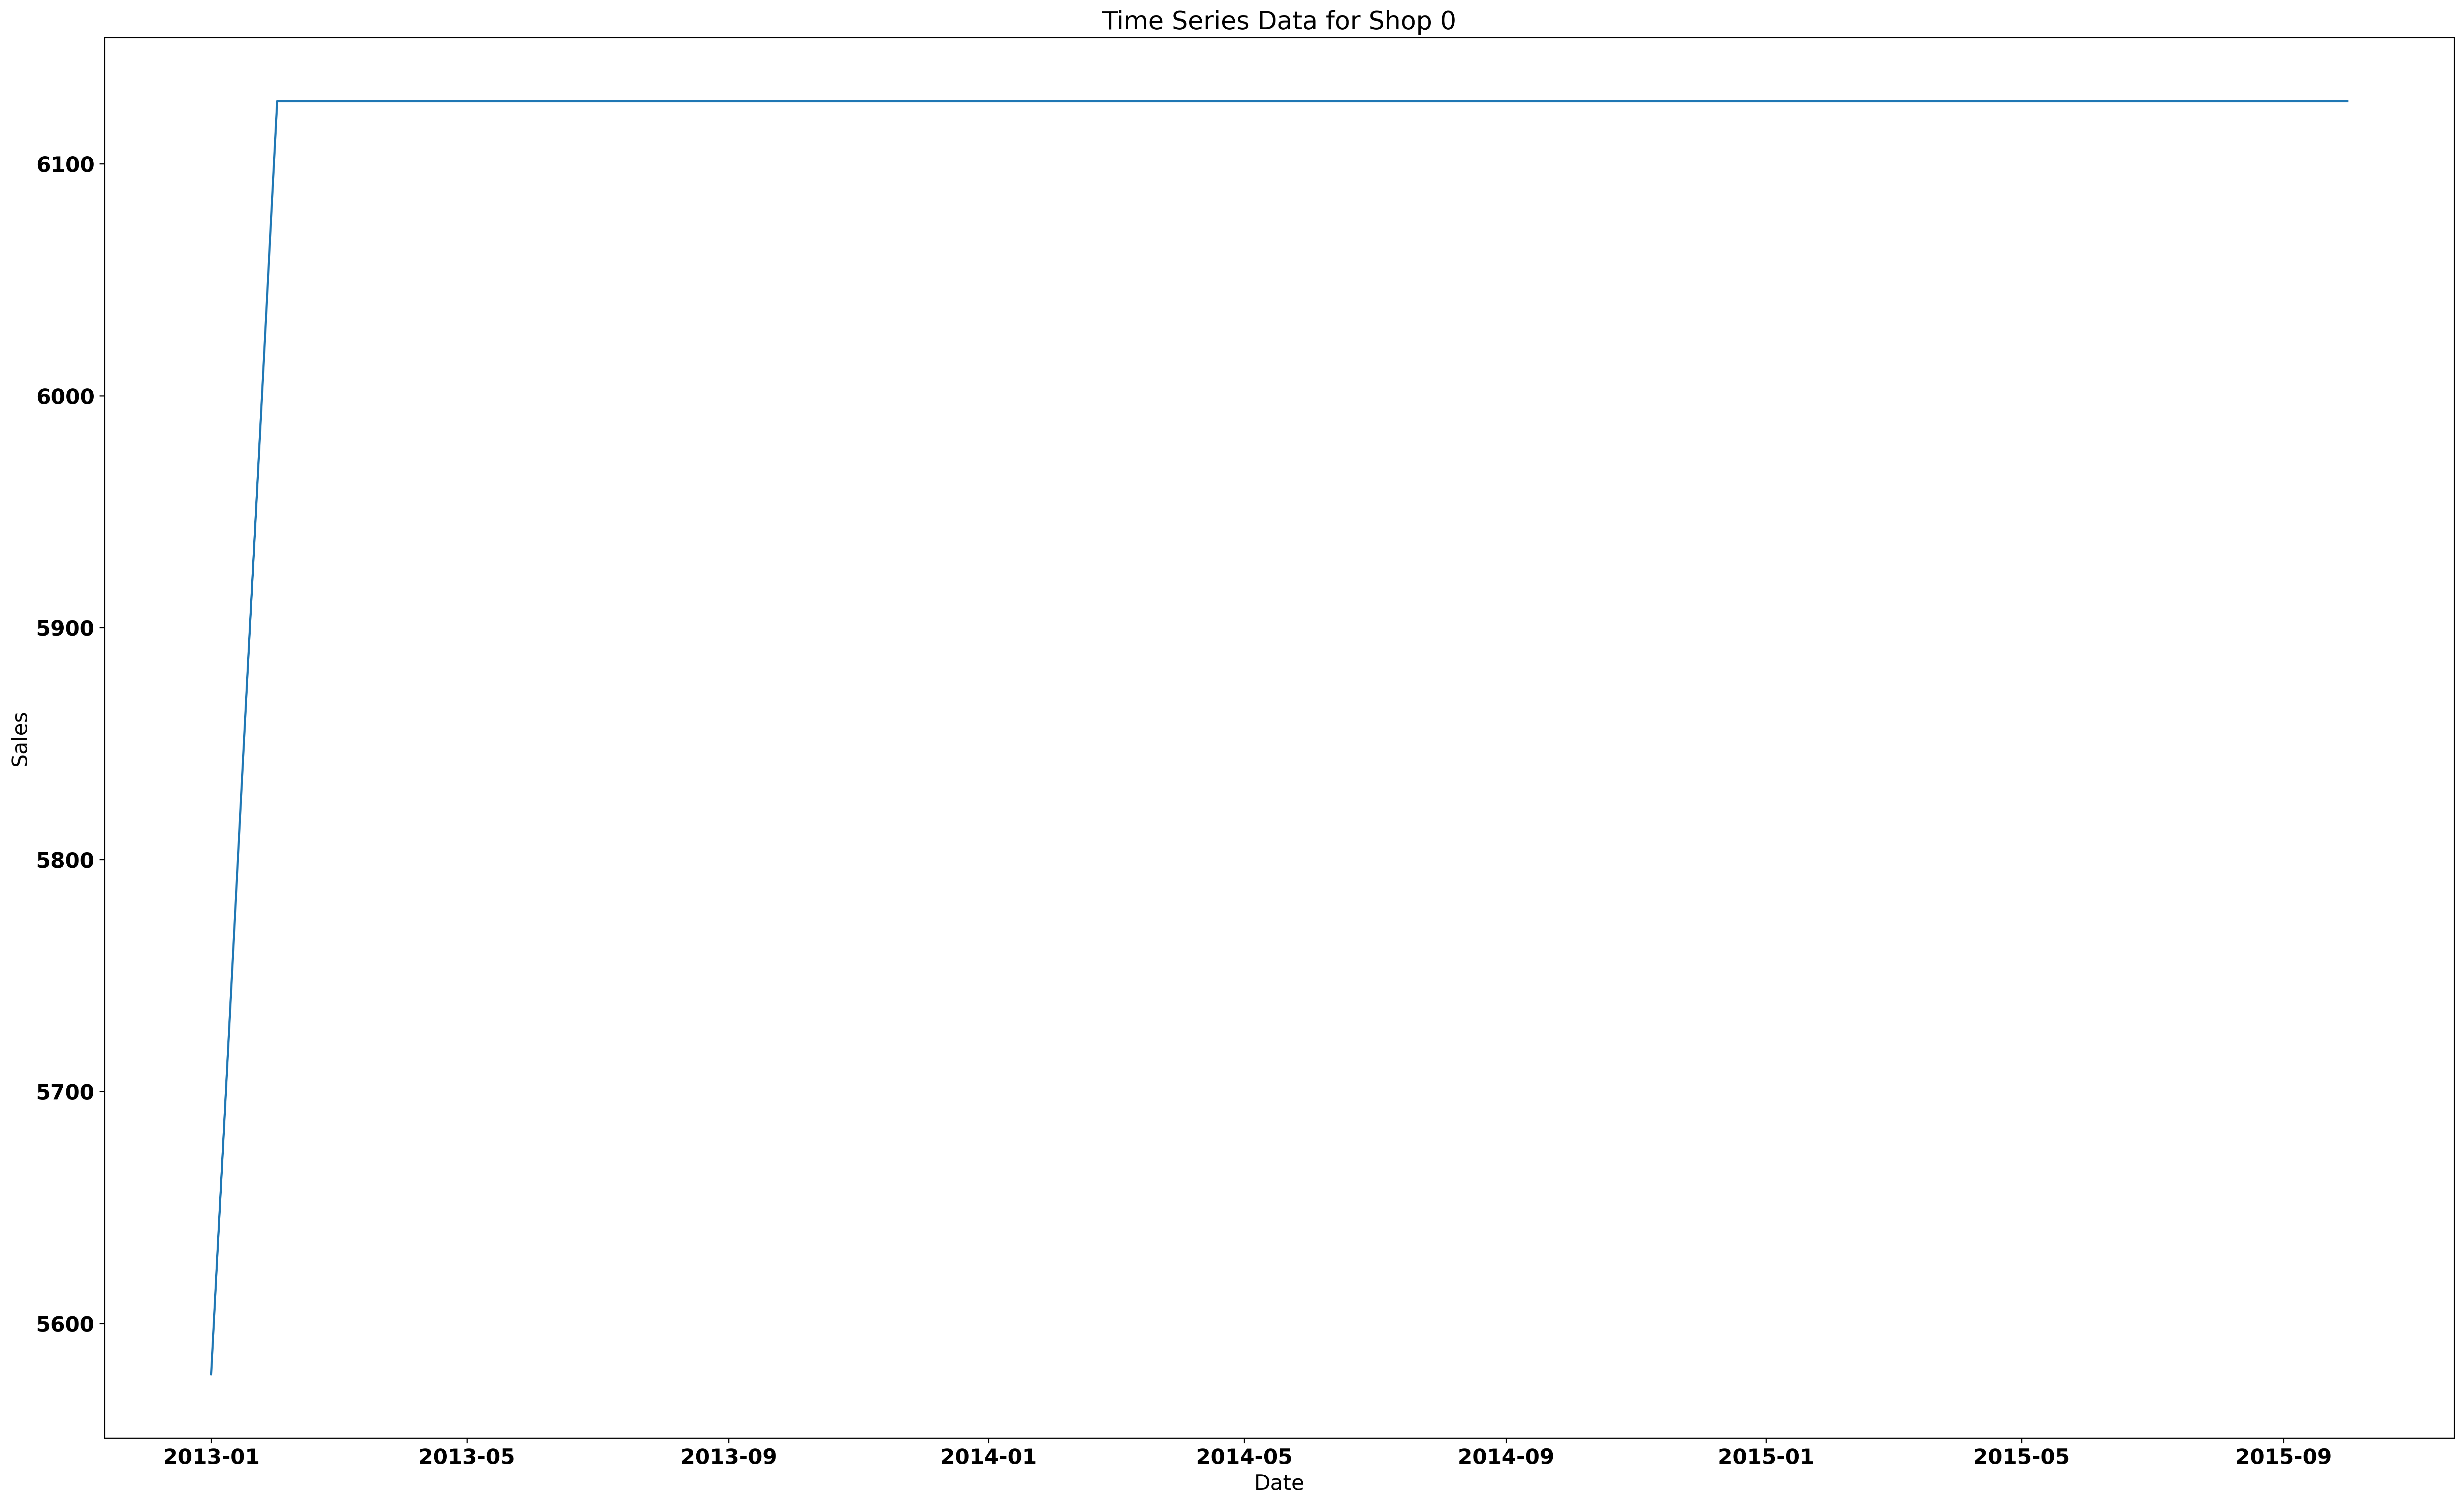

In [58]:
plt.plot(df['Shop_0'])
plt.title('Time Series Data for Shop 0')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

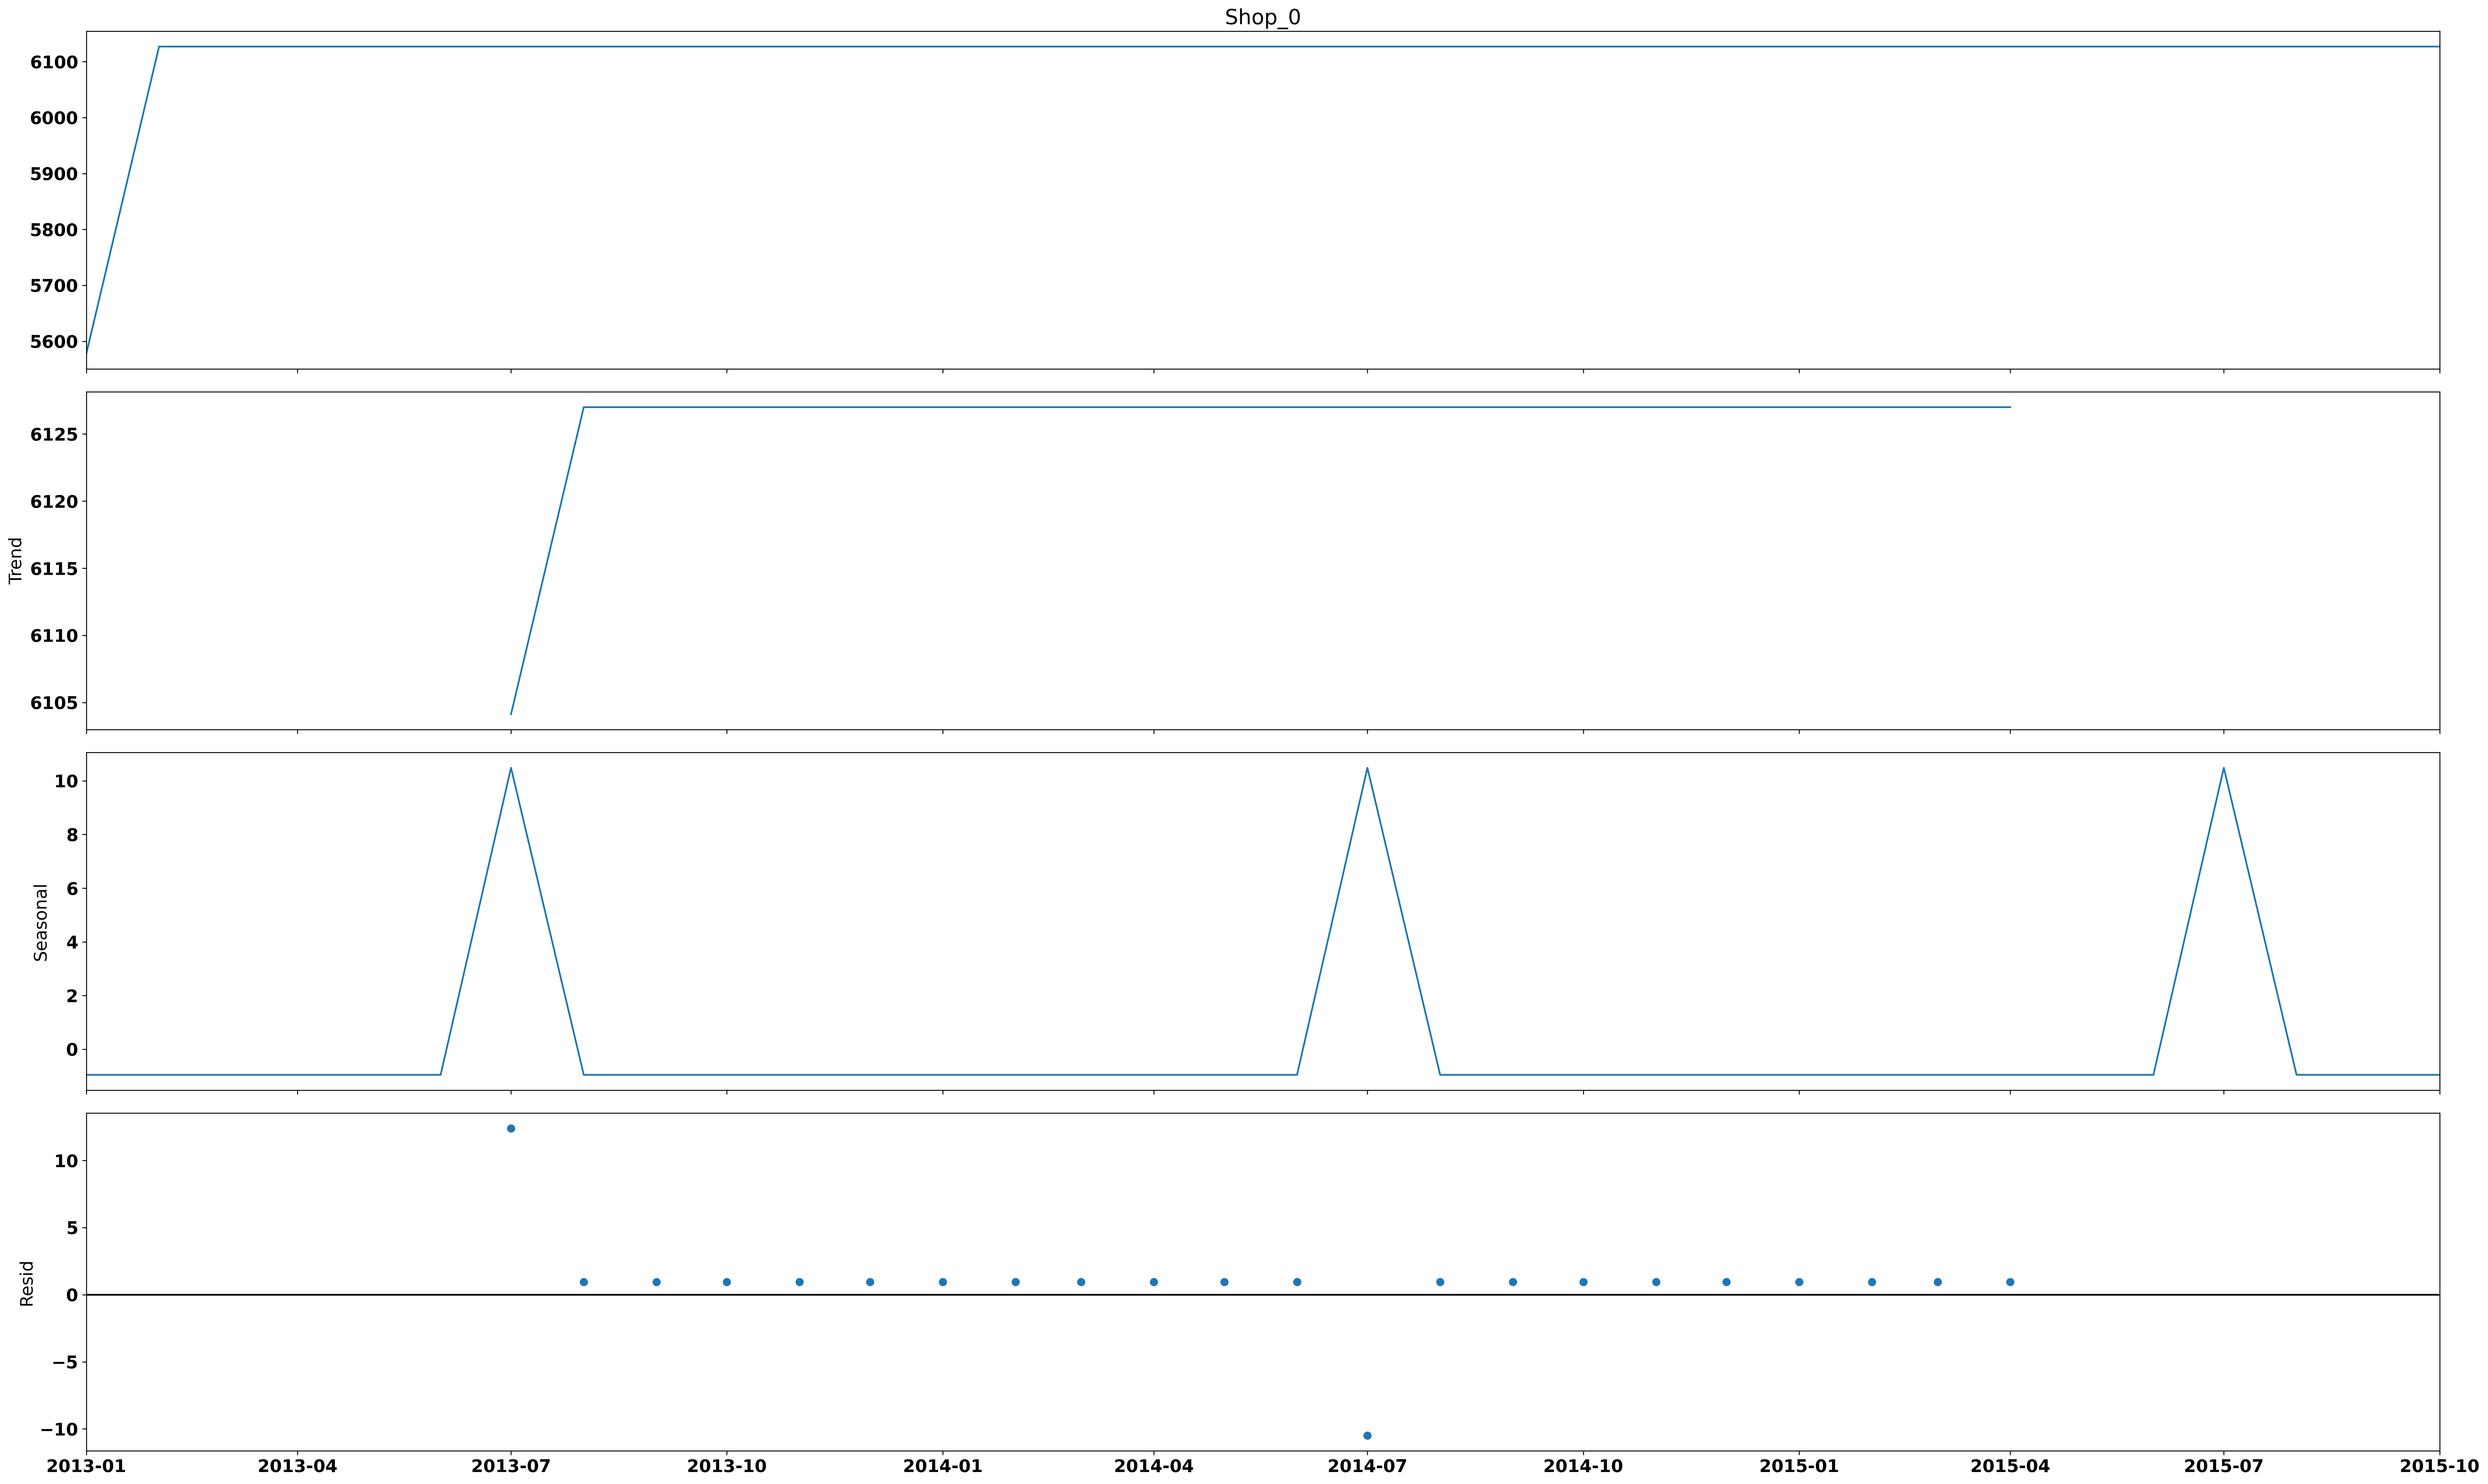

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Shop_0'], model='additive', period=12)
result.plot()
plt.show()


In [61]:
df

Shop_0  Shop_1  Shop_2  Shop_3  Shop_4  Shop_5  Shop_6  Shop_7  \
month                                                                        
2013-01-01  5578.0  2947.0  1146.0   767.0  2114.0   877.0  3686.0  2495.0   
2013-02-01  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03-01  6127.0  3364.0   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04-01  6127.0  3364.0   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05-01  6127.0  3364.0   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06-01  6127.0  3364.0   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07-01  6127.0  3364.0   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08-01  6127.0  3364.0   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09-01  6127.0  3364.0   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10-01  6127.0  3364.0   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11-01  6127.0  3364.0   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12-01  6127.0  3364.0  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01-01  6127.0  3364.0   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02-01  6127.0  3364.0   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03-01  6127.0  3364.0   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04-01  6127.0  3364.0   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05-01  6127.0  3364.0   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06-01  6127.0  3364.0   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07-01  6127.0  3364.0   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08-01  6127.0  3364.0   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09-01  6127.0  3364.0   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10-01  6127.0  3364.0   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11-01  6127.0  3364.0  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12-01  6127.0  3364.0  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01-01  6127.0  3364.0   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02-01  6127.0  3364.0   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03-01  6127.0  3364.0   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04-01  6127.0  3364.0   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05-01  6127.0  3364.0   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06-01  6127.0  3364.0   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07-01  6127.0  3364.0   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08-01  6127.0  3364.0   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09-01  6127.0  3364.0   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10-01  6127.0  3364.0   727.0   613.0   831.0  1052.0  1802.0  1212.0   

            Shop_8  Shop_9  ...  Shop_50  Shop_51  Shop_52  Shop_53  Shop_54  \
month                       ...                                                
2013-01-01  1463.0  6526.0  ...   3406.0   2748.0   1812.0   2055.0   9386.0   
2013-02-01  1156.0  6526.0  ...   3054.0   2284.0   1737.0   1906.0   8075.0   
2013-03-01   977.0  6526.0  ...   3610.0   2605.0   2034.0   2365.0   9488.0   
2013-04-01    -1.0  6526.0  ...   2740.0   1945.0   1446.0   1515.0   6726.0   
2013-05-01    -1.0  6526.0  ...   2839.0   2243.0   1482.0   1767.0   7006.0   
2013-06-01    -1.0  6526.0  ...   3761.0   2200.0   1815.0   2125.0   8101.0   
2013-07-01    -1.0  6526.0  ...   3235.0   2273.0   1616.0   1975.0   7225.0   
2013-08-01    -1.0  6526.0  ...   3718.0   2142.0   1772.0   2367.0   7792.0   
2013-09-01    -1.0  6526.0  ...   3655.0   1903.0   2125.0   2440.0   7827.0   
2013-10-01    -1.0  6526.0  ...   3525.0   1809.0   1965.0   2245.0   6676.0   
2013-11-01    -1.0  6526.0  ...   3554.0   1783.0   1897.0   2192.0   7978.0   
2013-12-01    -1.0  6526.0  ...   4762.0   2242.0   2384.0   3028.0  10055.0   
2014-01-01    -1.0  6526.0  ...   3002.0   1623.0   1625.0   2144.0   8198.0   
201

In [64]:
data= df.copy()

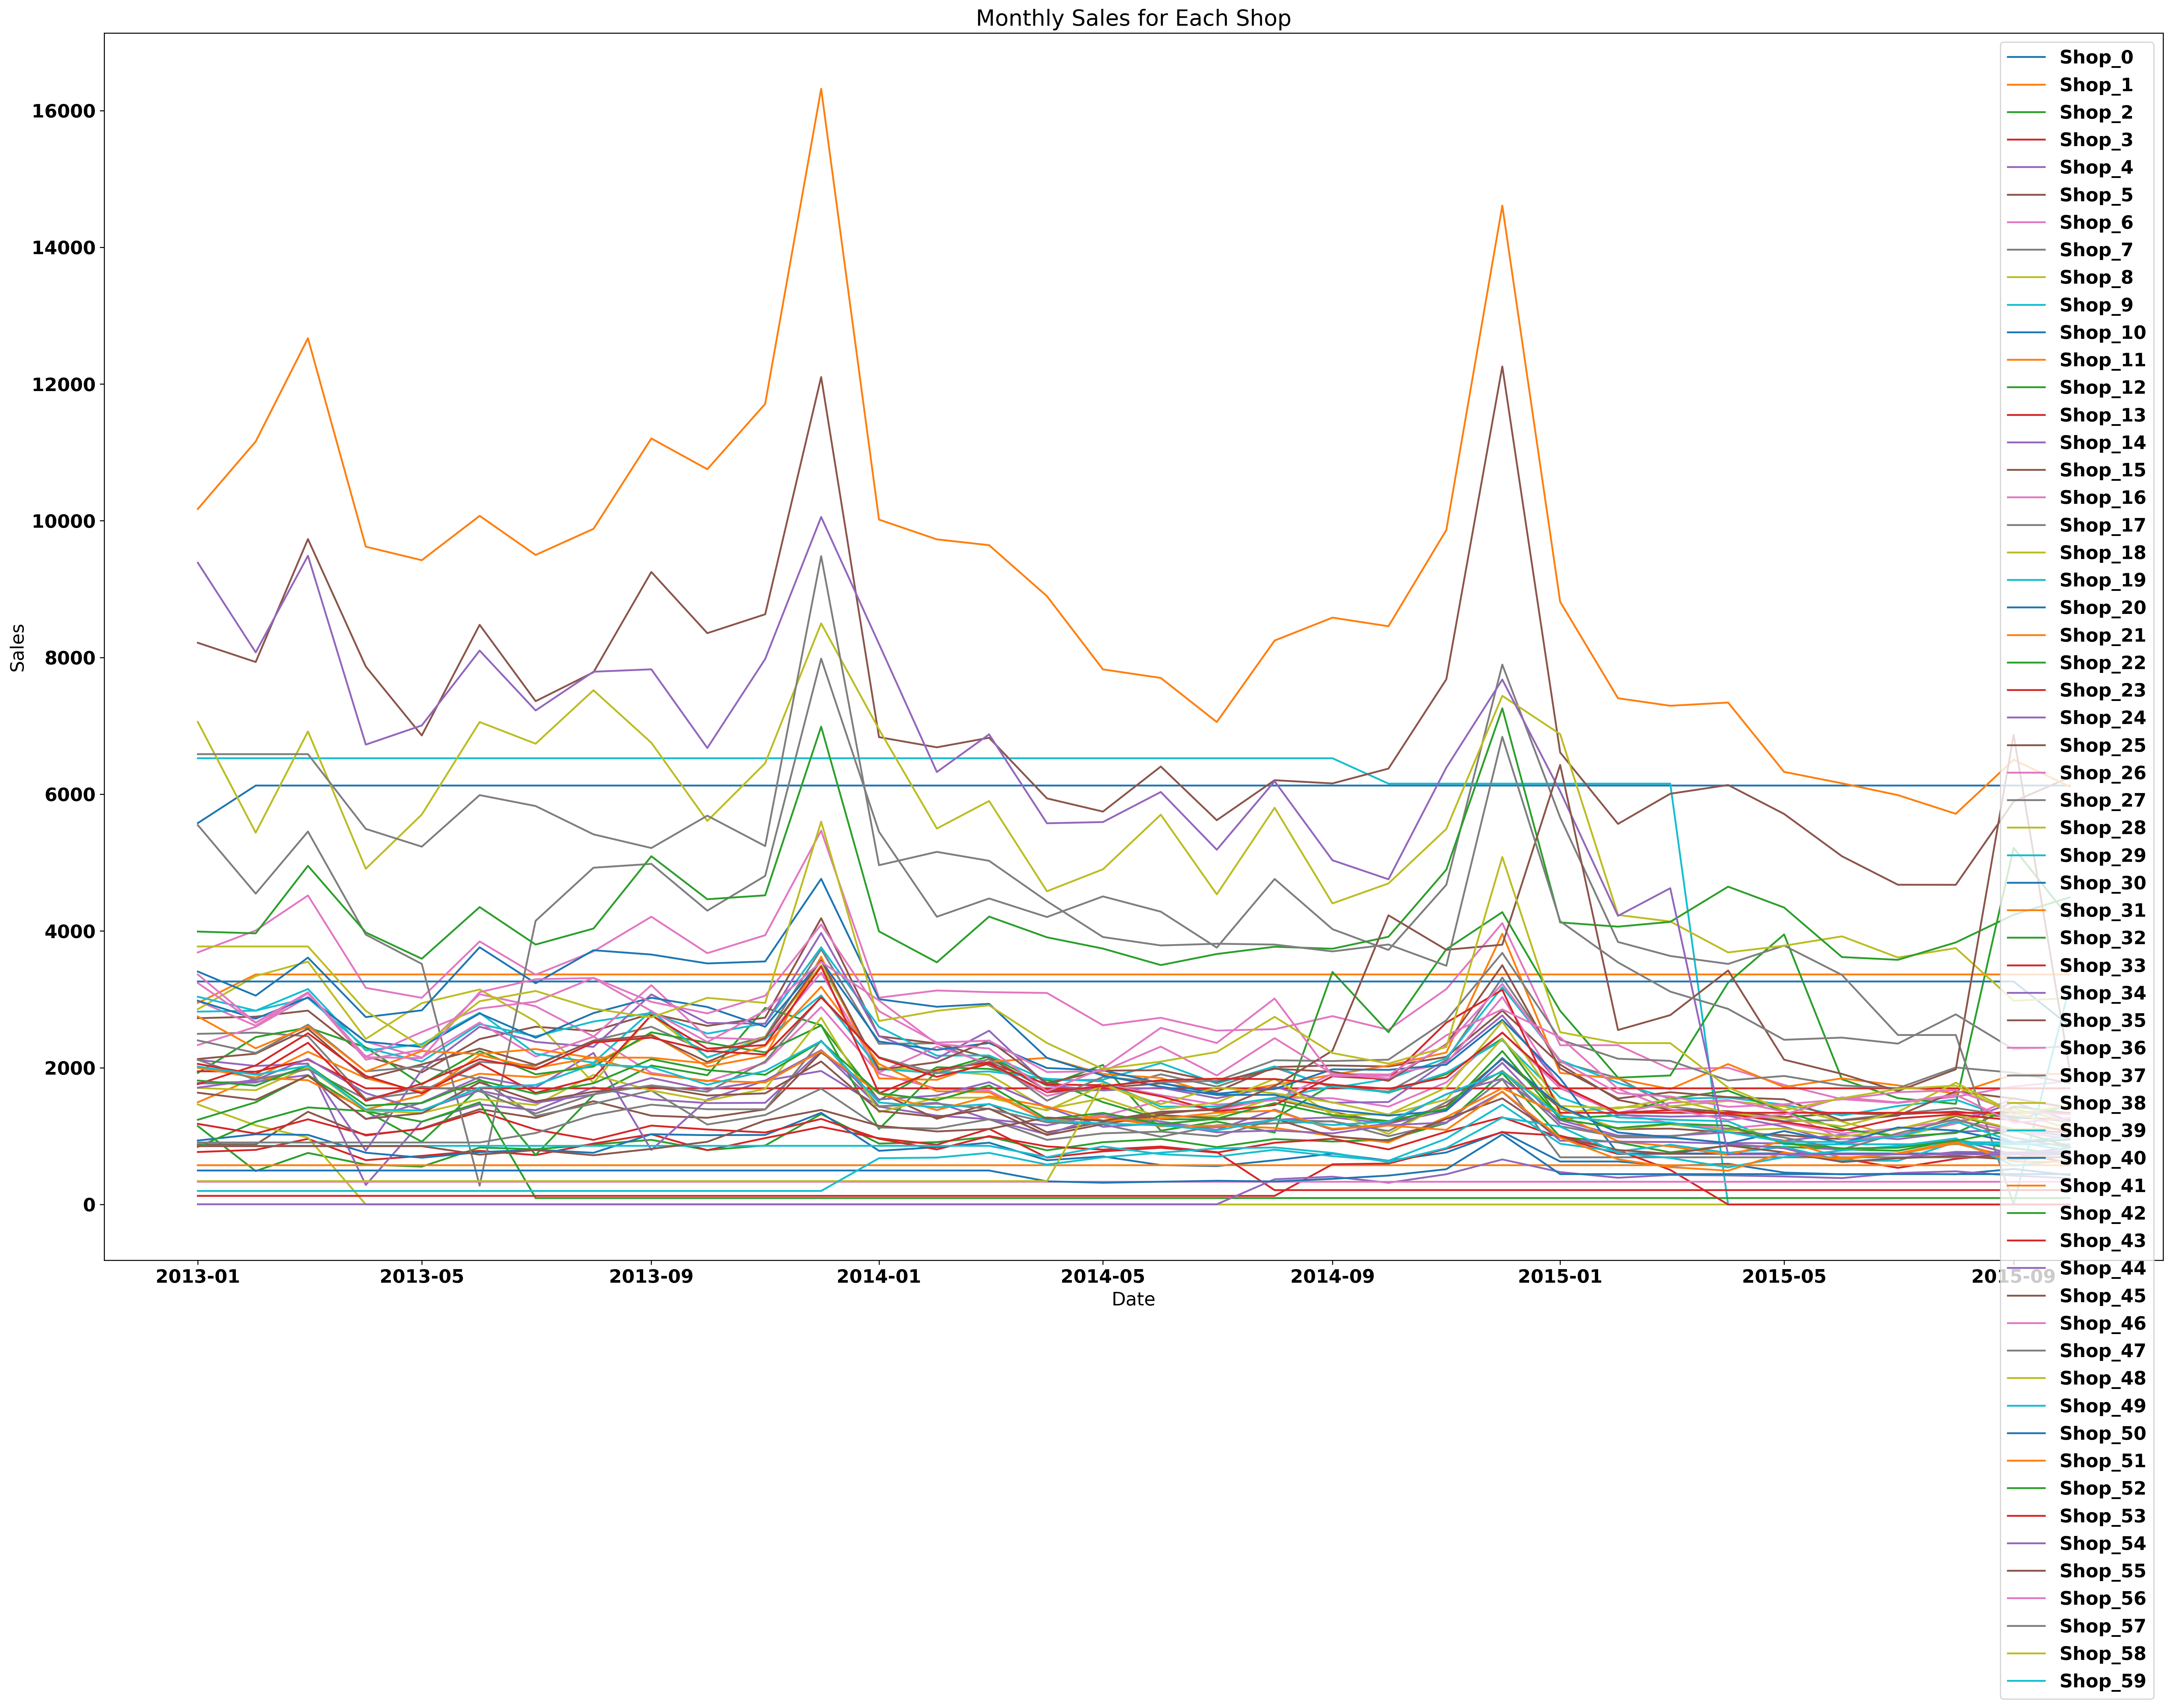

In [65]:
for shop in data.columns:
    plt.plot(data.index, data[shop], label=shop)
plt.legend()
plt.title('Monthly Sales for Each Shop')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

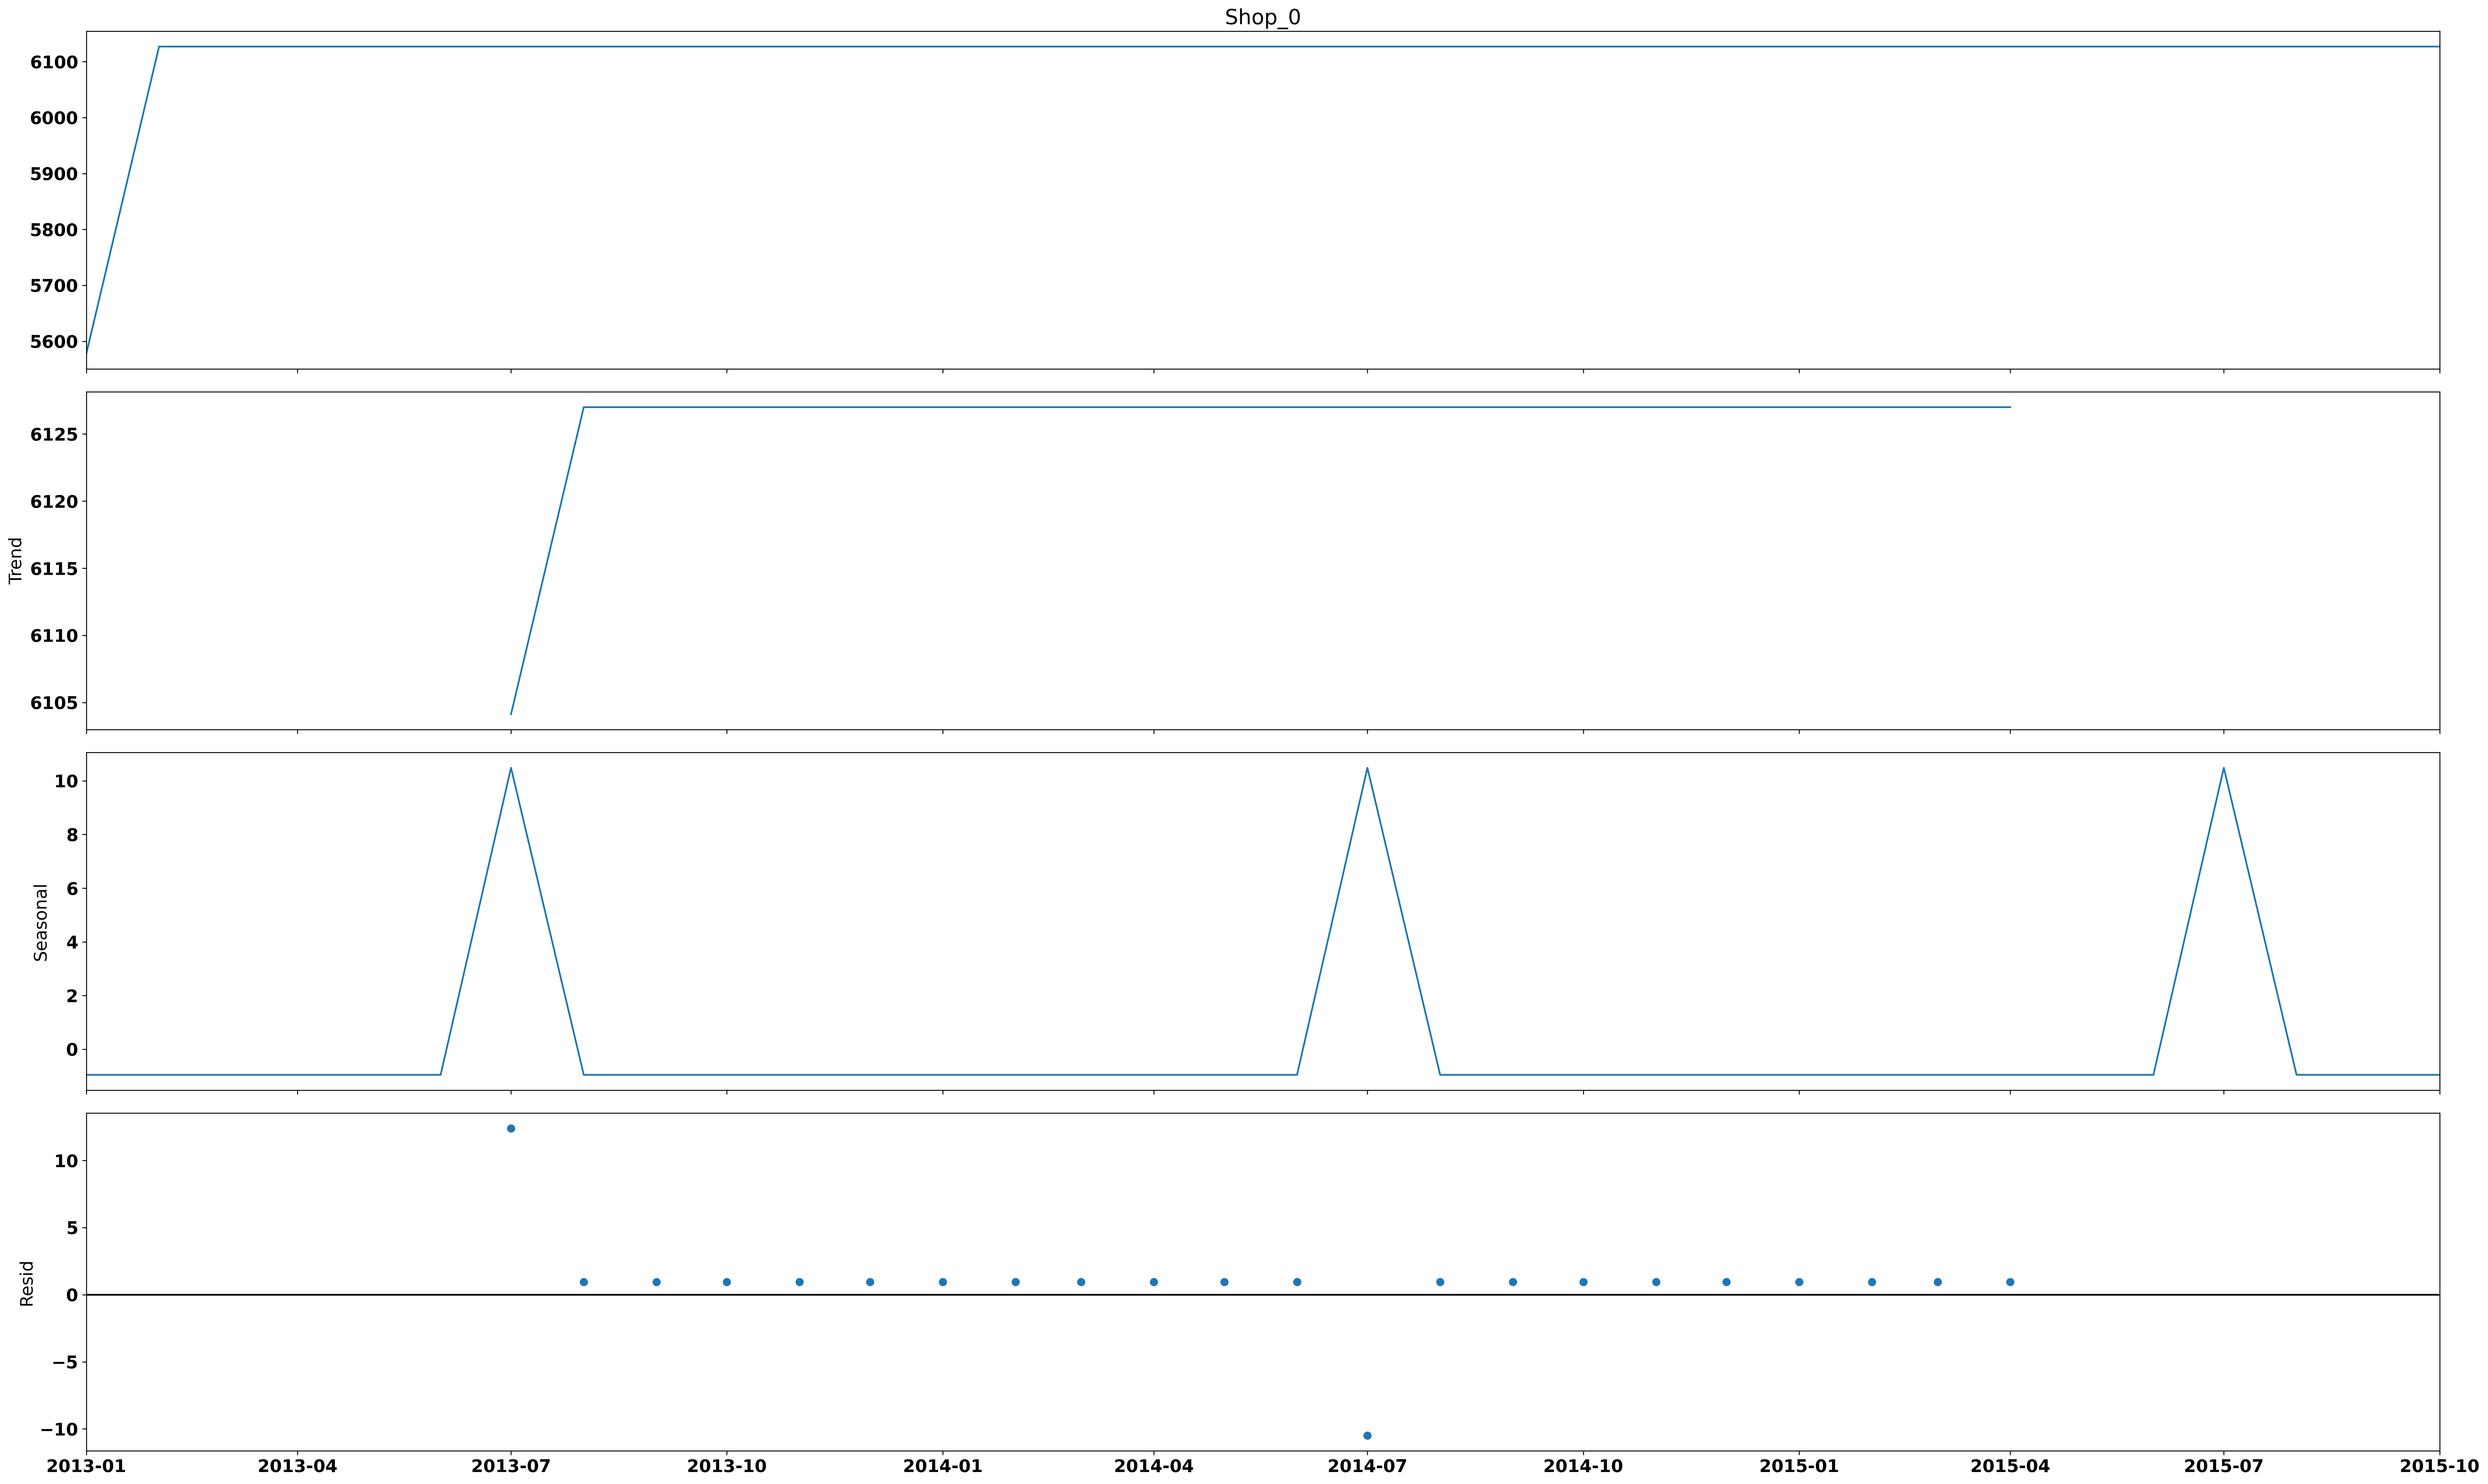

In [68]:
result = seasonal_decompose(data['Shop_0'], model='additive')
result.plot()
plt.show()



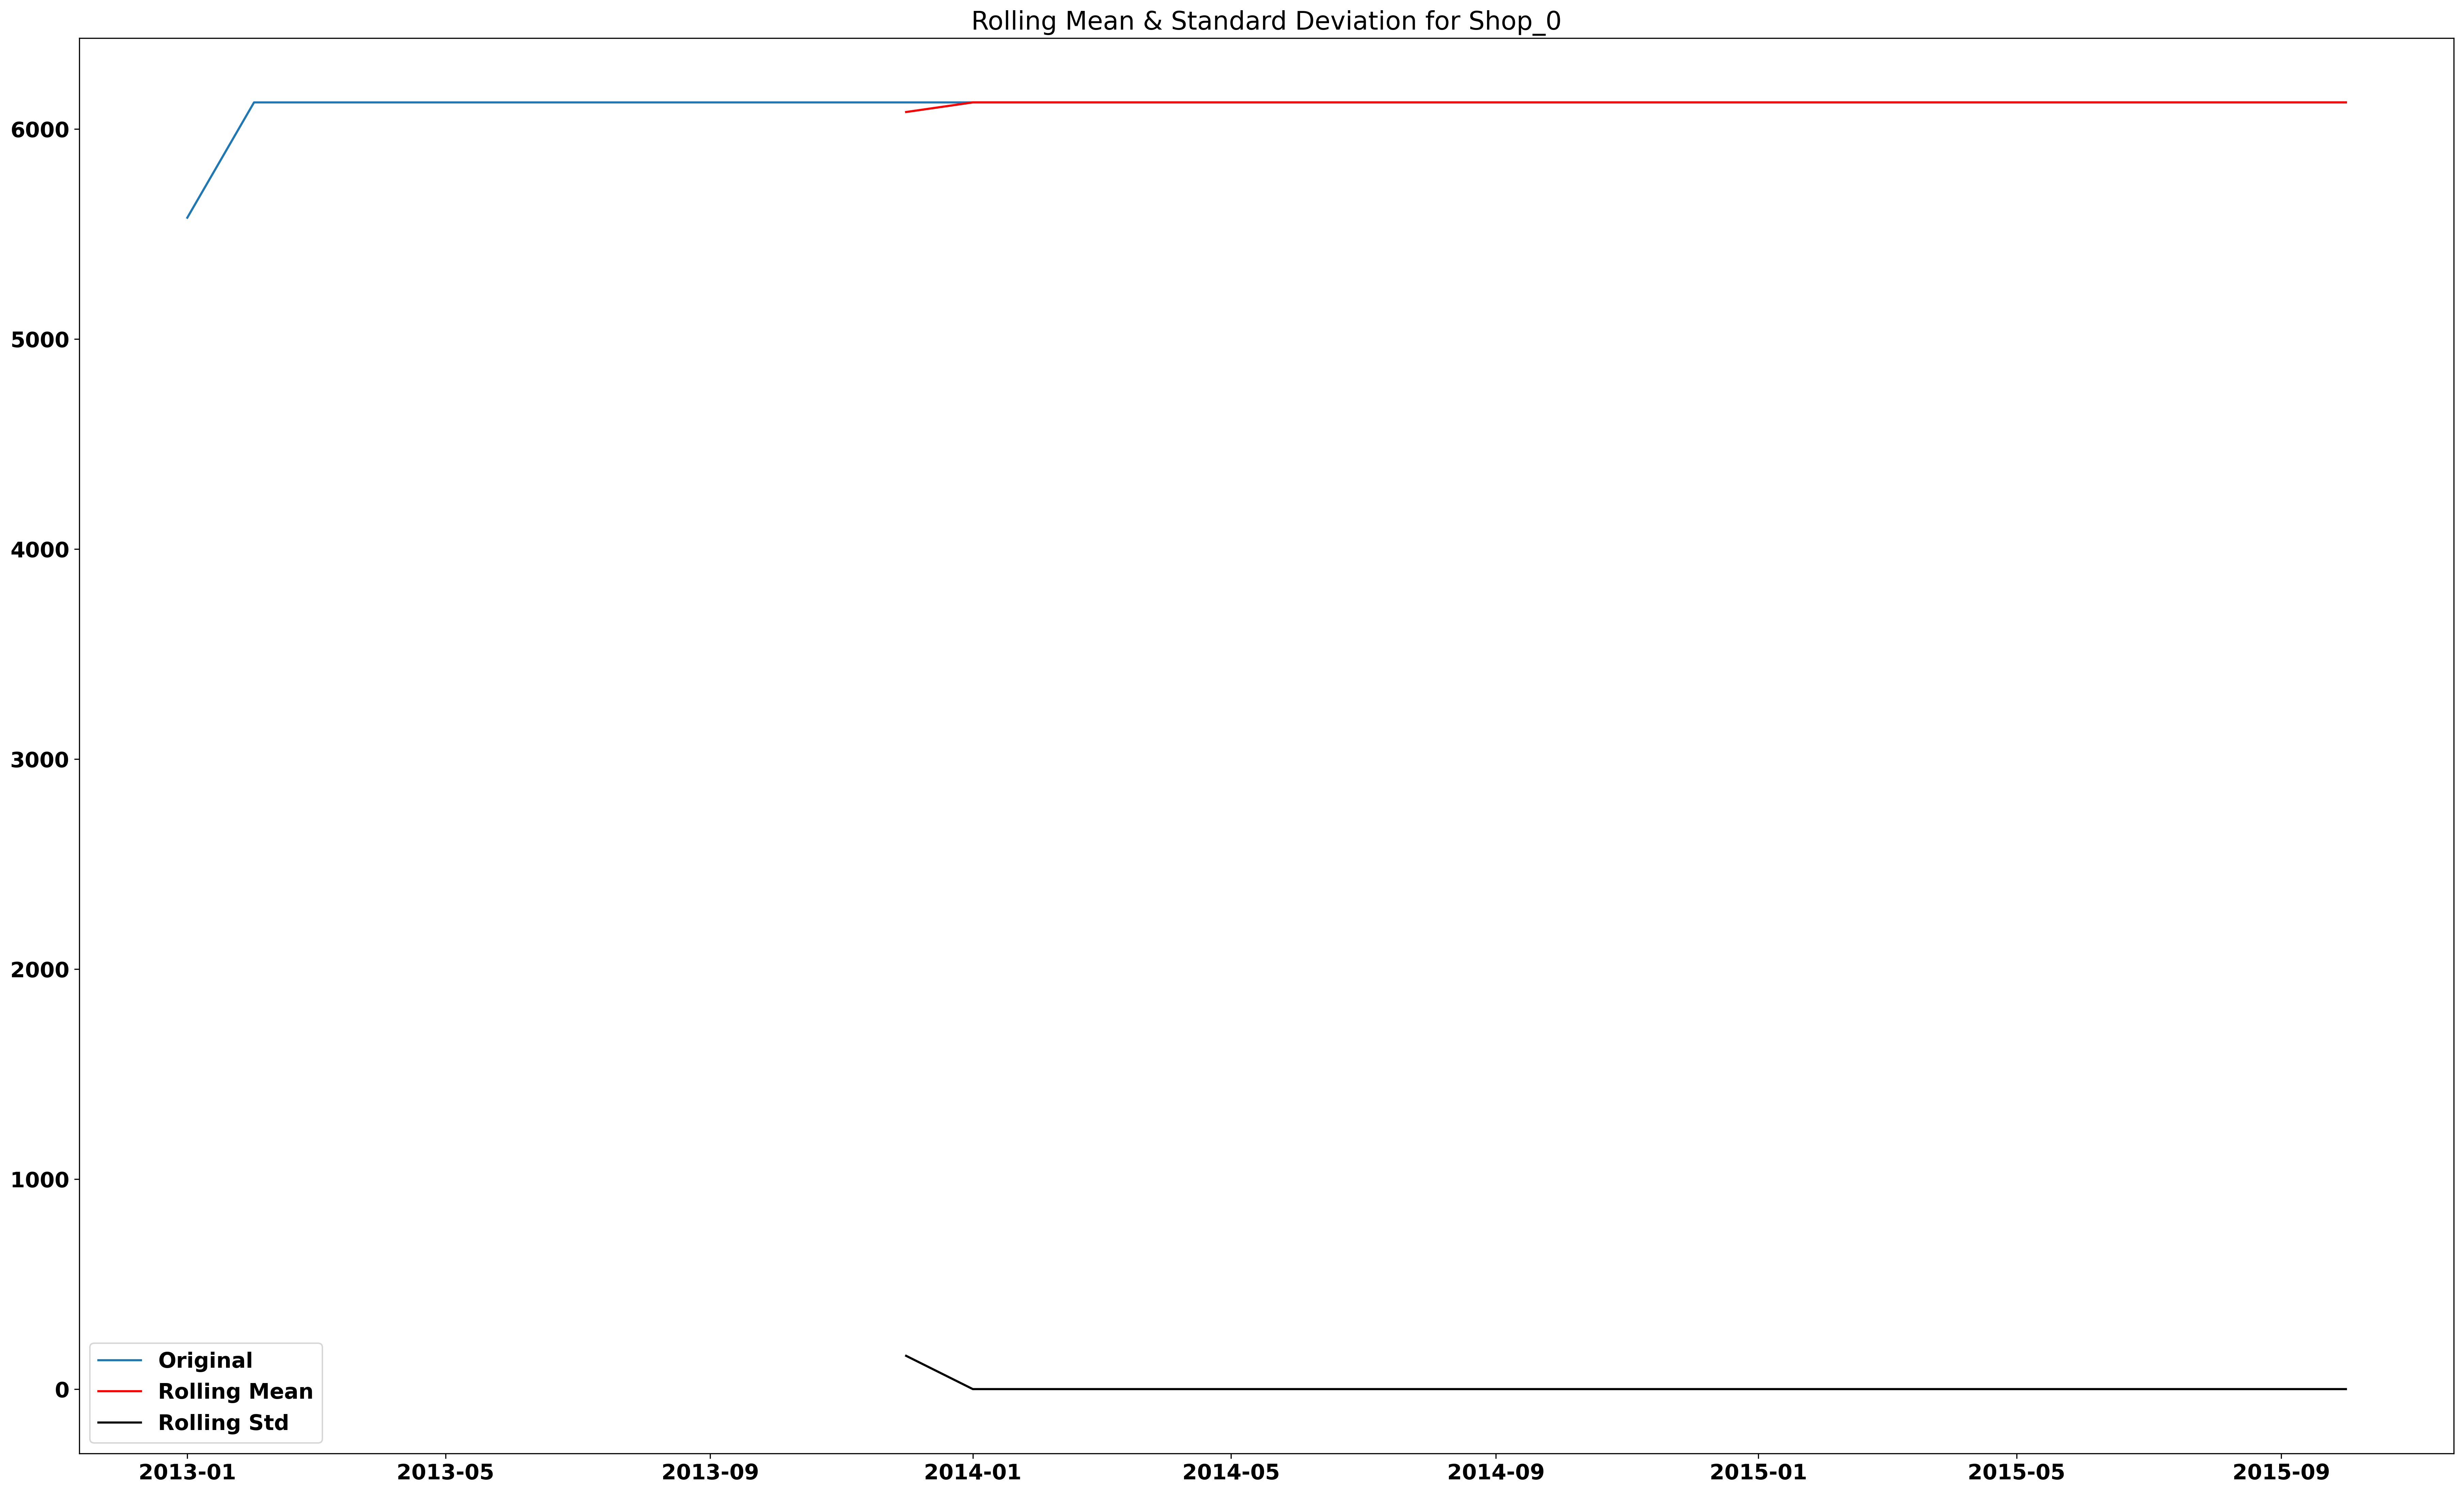

In [70]:
# Rolling statistics plot for a specific shop (e.g., Shop_0)
shop_data = data['Shop_0']
rolling_mean = shop_data.rolling(window=12).mean()
rolling_std = shop_data.rolling(window=12).std()

plt.plot(shop_data, label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Shop_0')
plt.show()


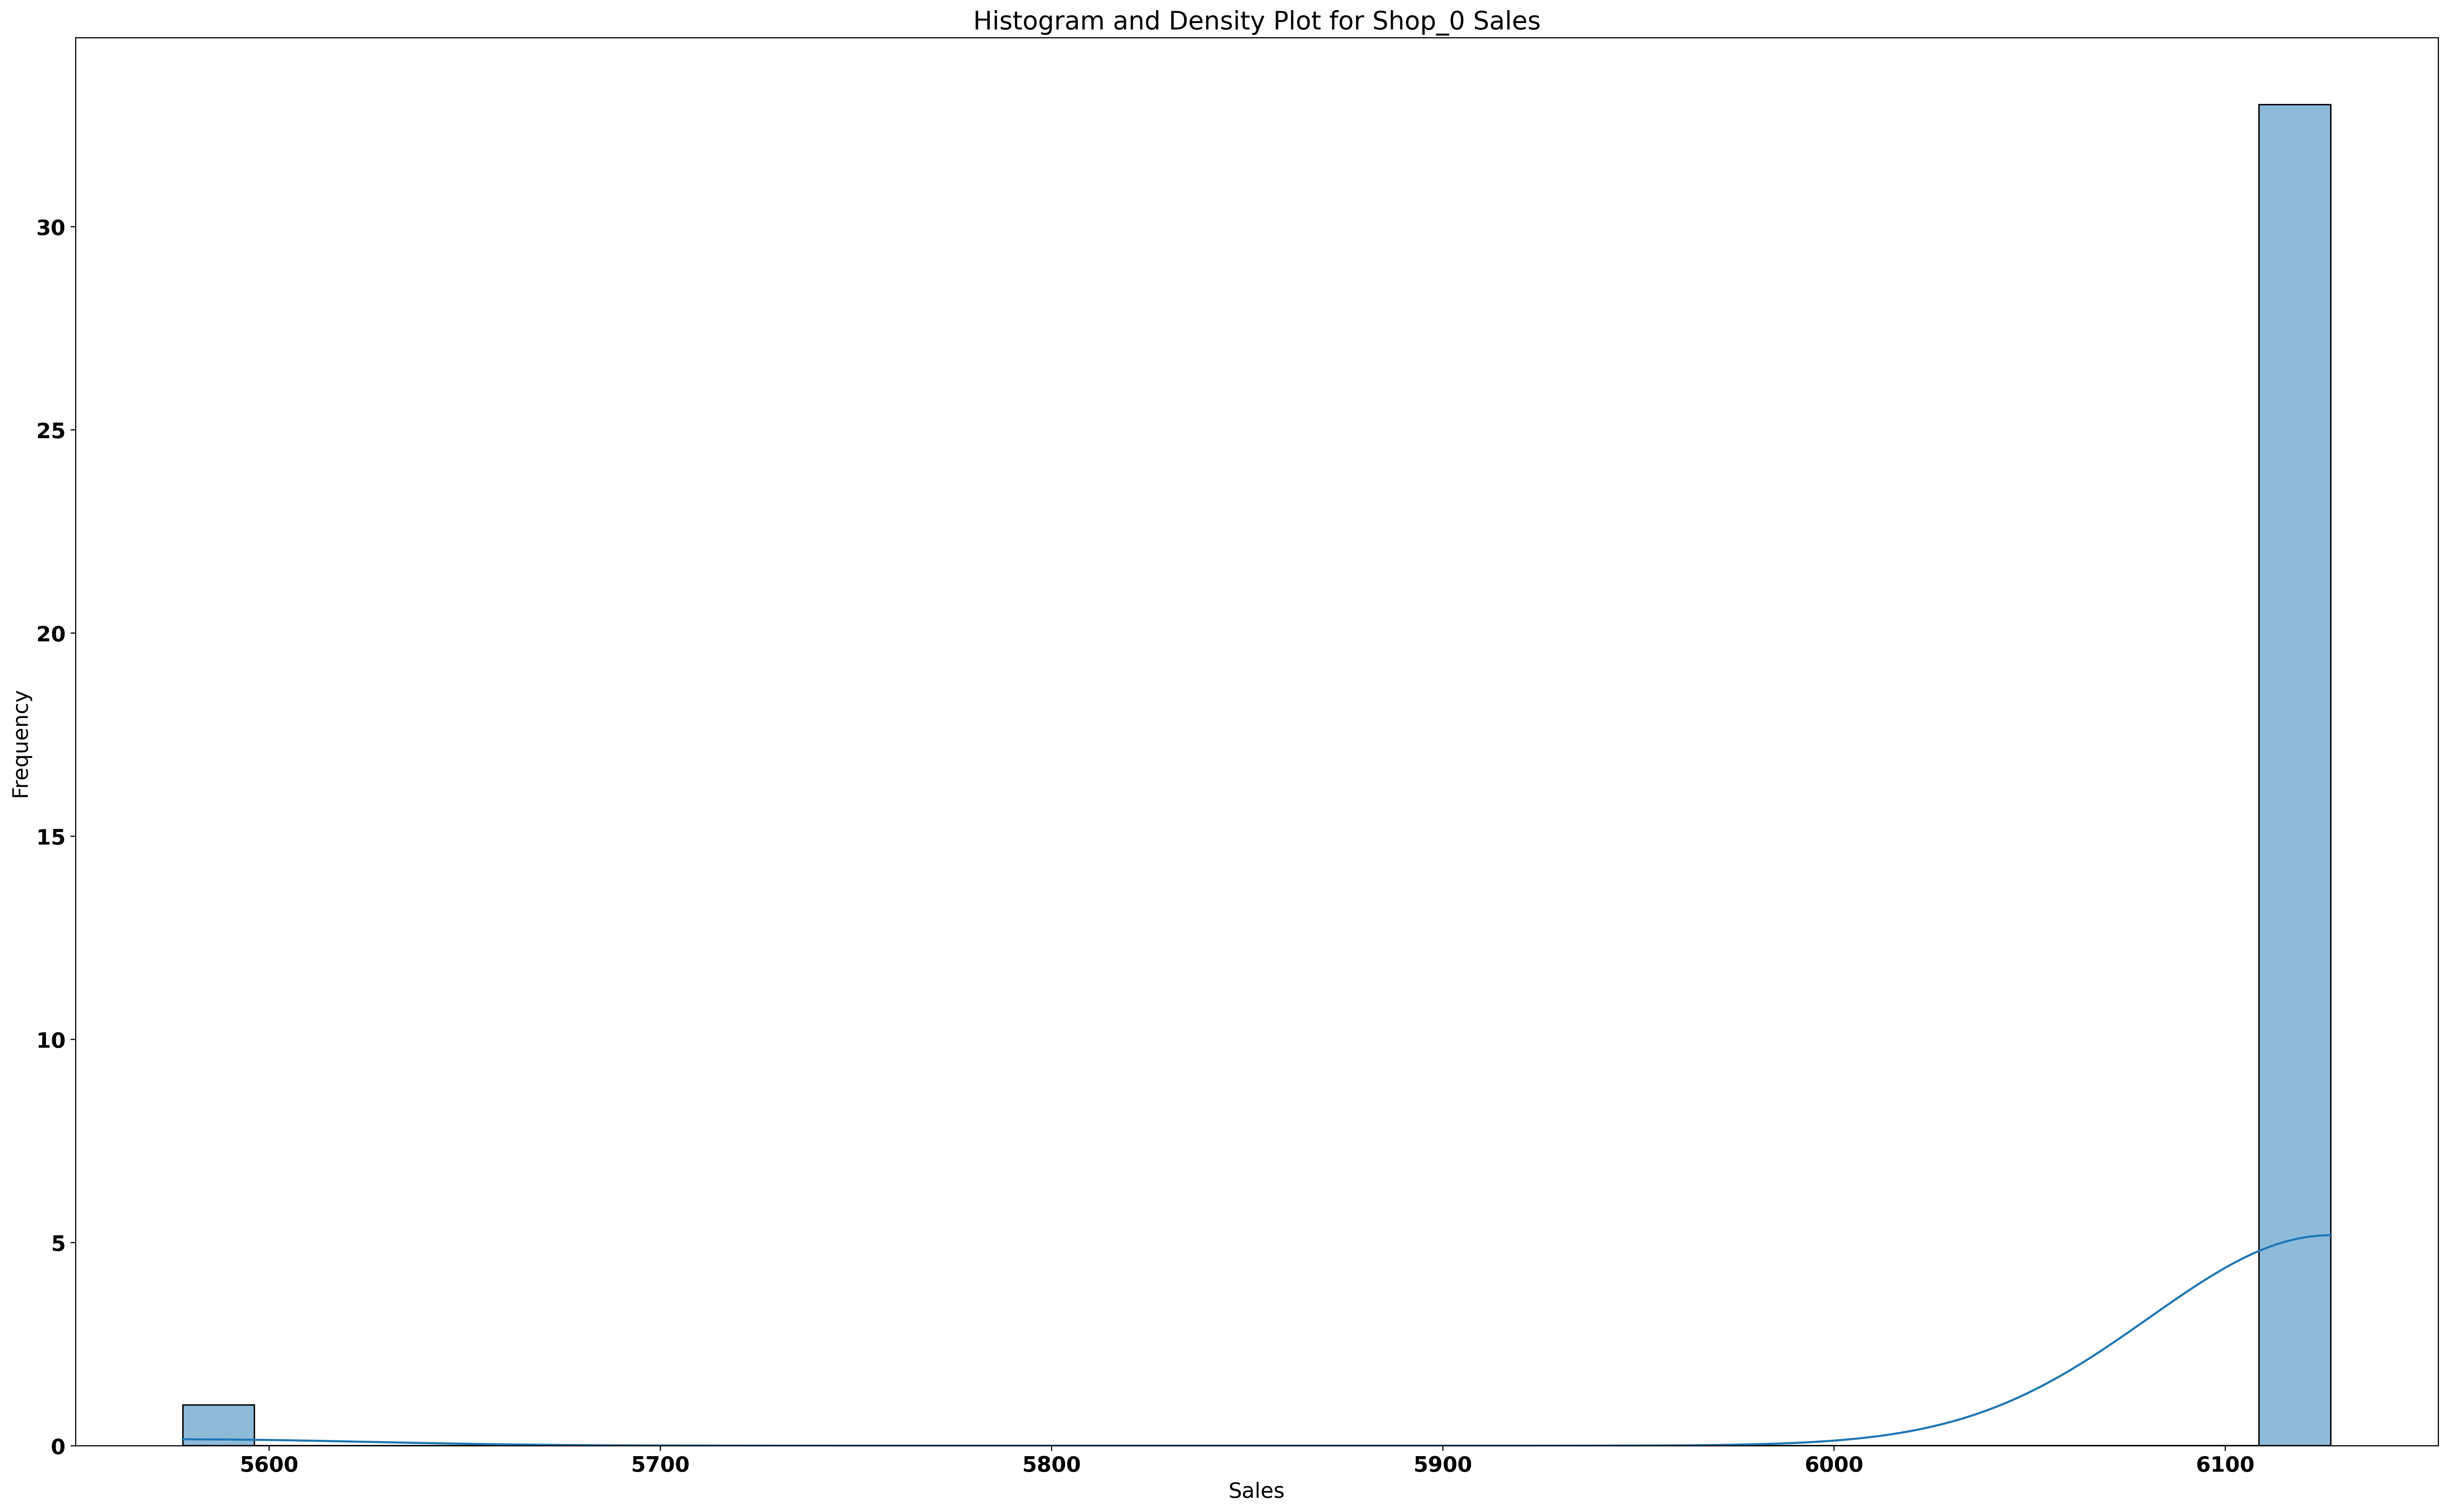

In [73]:
sns.histplot(data['Shop_0'], kde=True, bins=30)
plt.title('Histogram and Density Plot for Shop_0 Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


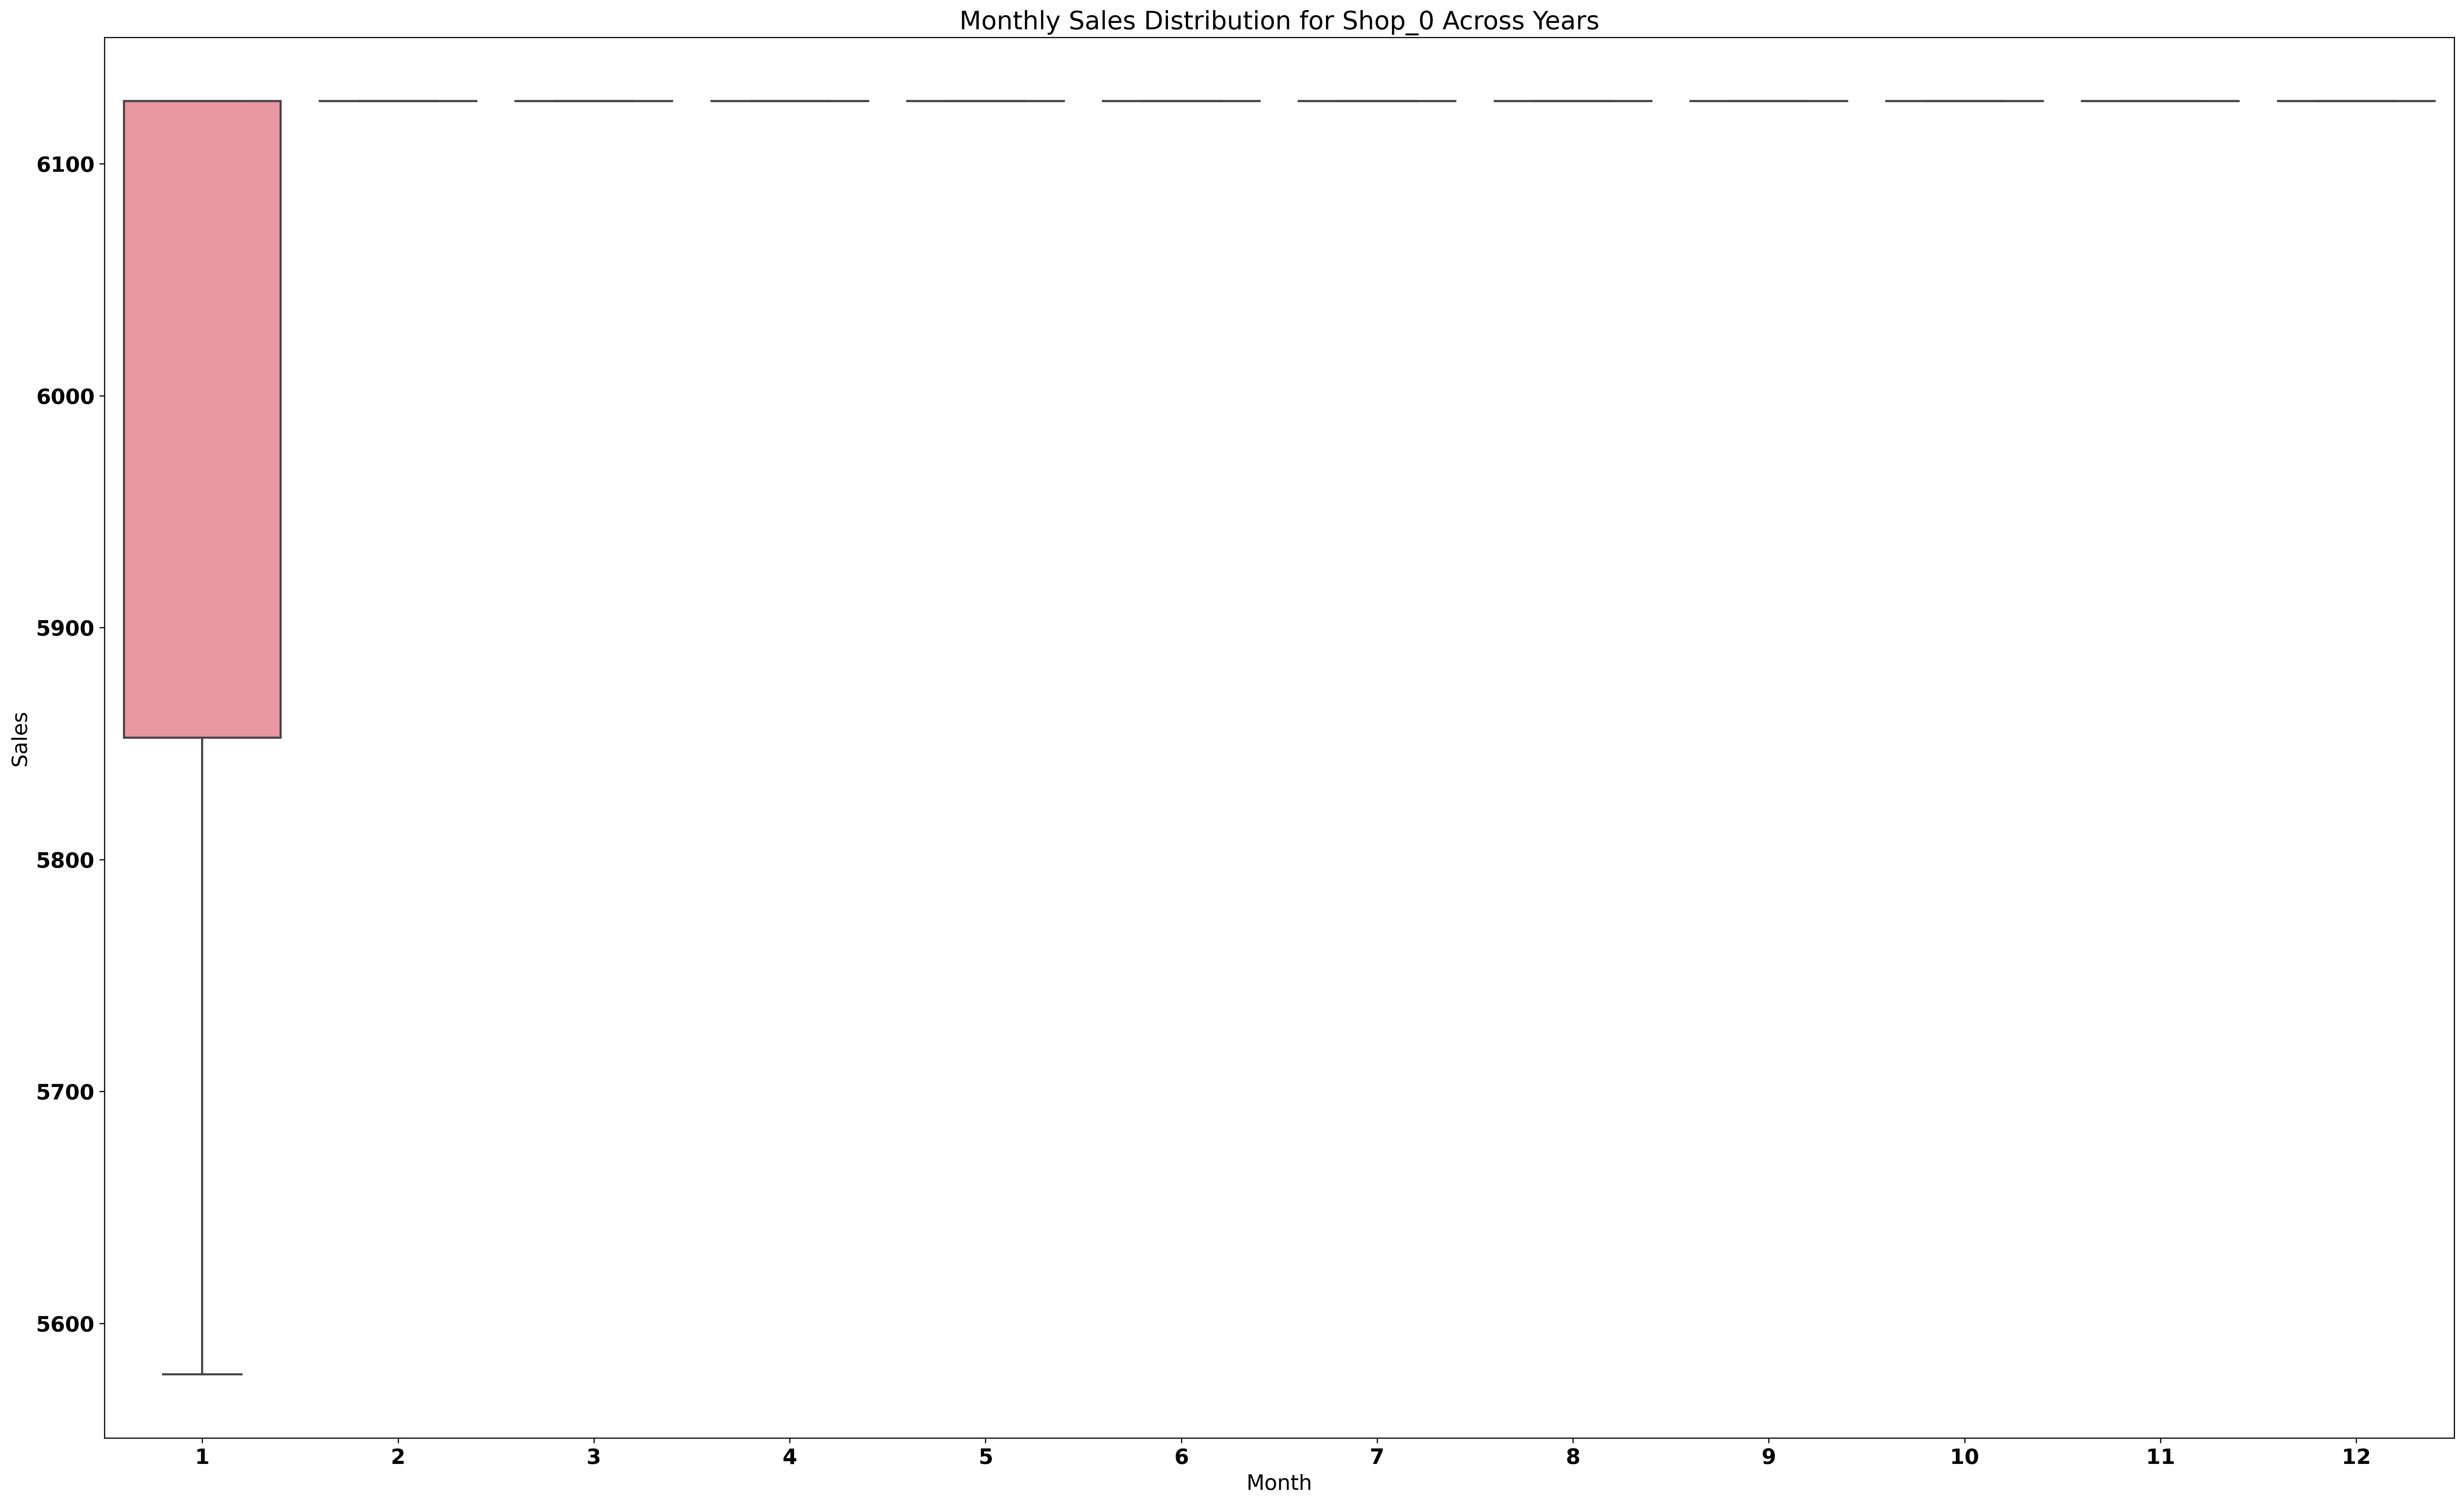

In [74]:
sns.boxplot(x=data.index.month, y='Shop_0', data=data.reset_index())
plt.title('Monthly Sales Distribution for Shop_0 Across Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose


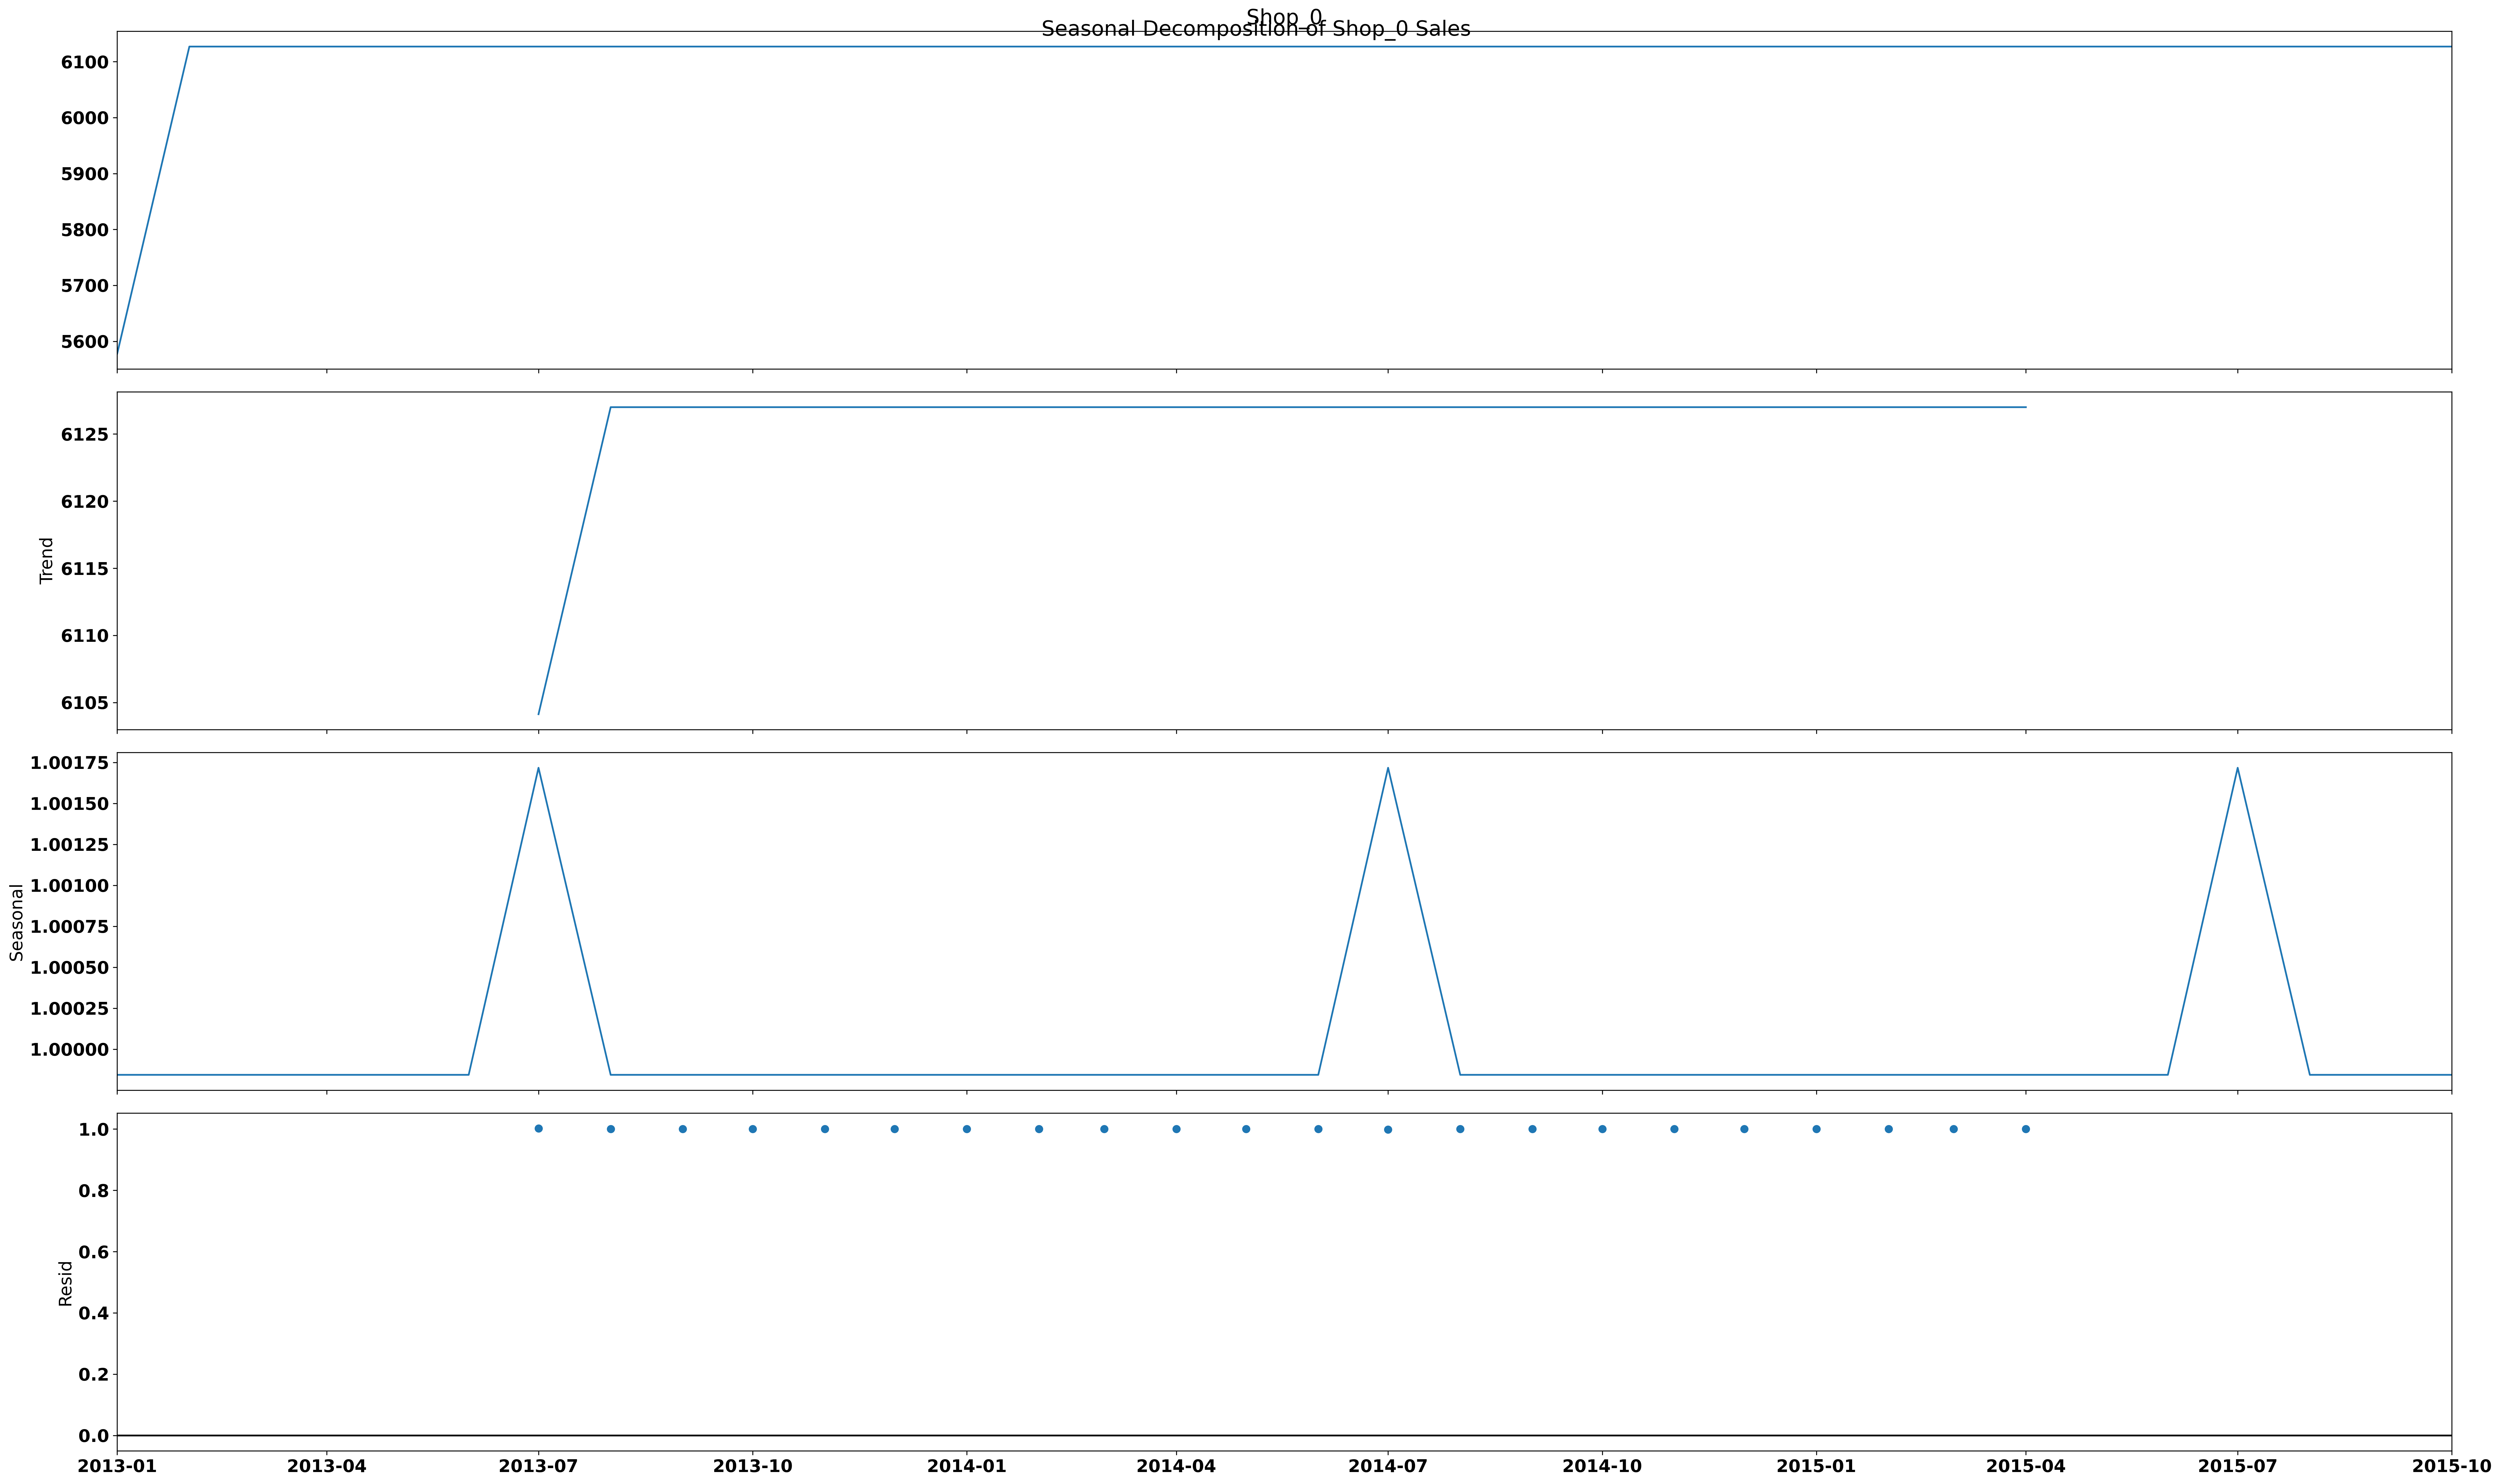

In [76]:
result = seasonal_decompose(data['Shop_0'], model='multiplicative')

# Plot the decomposition
result.plot()
plt.suptitle('Seasonal Decomposition of Shop_0 Sales')
plt.show()

In [83]:
df

Shop_0  Shop_1  Shop_2  Shop_3  Shop_4  Shop_5  Shop_6  Shop_7  \
month                                                                        
2013-01-01  5578.0  2947.0  1146.0   767.0  2114.0   877.0  3686.0  2495.0   
2013-02-01  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03-01  6127.0  3364.0   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04-01  6127.0  3364.0   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05-01  6127.0  3364.0   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06-01  6127.0  3364.0   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07-01  6127.0  3364.0   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08-01  6127.0  3364.0   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09-01  6127.0  3364.0   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10-01  6127.0  3364.0   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11-01  6127.0  3364.0   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12-01  6127.0  3364.0  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01-01  6127.0  3364.0   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02-01  6127.0  3364.0   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03-01  6127.0  3364.0   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04-01  6127.0  3364.0   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05-01  6127.0  3364.0   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06-01  6127.0  3364.0   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07-01  6127.0  3364.0   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08-01  6127.0  3364.0   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09-01  6127.0  3364.0   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10-01  6127.0  3364.0   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11-01  6127.0  3364.0  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12-01  6127.0  3364.0  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01-01  6127.0  3364.0   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02-01  6127.0  3364.0   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03-01  6127.0  3364.0   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04-01  6127.0  3364.0   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05-01  6127.0  3364.0   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06-01  6127.0  3364.0   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07-01  6127.0  3364.0   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08-01  6127.0  3364.0   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09-01  6127.0  3364.0   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10-01  6127.0  3364.0   727.0   613.0   831.0  1052.0  1802.0  1212.0   

            Shop_8  Shop_9  ...  Shop_50  Shop_51  Shop_52  Shop_53  Shop_54  \
month                       ...                                                
2013-01-01  1463.0  6526.0  ...   3406.0   2748.0   1812.0   2055.0   9386.0   
2013-02-01  1156.0  6526.0  ...   3054.0   2284.0   1737.0   1906.0   8075.0   
2013-03-01   977.0  6526.0  ...   3610.0   2605.0   2034.0   2365.0   9488.0   
2013-04-01    -1.0  6526.0  ...   2740.0   1945.0   1446.0   1515.0   6726.0   
2013-05-01    -1.0  6526.0  ...   2839.0   2243.0   1482.0   1767.0   7006.0   
2013-06-01    -1.0  6526.0  ...   3761.0   2200.0   1815.0   2125.0   8101.0   
2013-07-01    -1.0  6526.0  ...   3235.0   2273.0   1616.0   1975.0   7225.0   
2013-08-01    -1.0  6526.0  ...   3718.0   2142.0   1772.0   2367.0   7792.0   
2013-09-01    -1.0  6526.0  ...   3655.0   1903.0   2125.0   2440.0   7827.0   
2013-10-01    -1.0  6526.0  ...   3525.0   1809.0   1965.0   2245.0   6676.0   
2013-11-01    -1.0  6526.0  ...   3554.0   1783.0   1897.0   2192.0   7978.0   
2013-12-01    -1.0  6526.0  ...   4762.0   2242.0   2384.0   3028.0  10055.0   
2014-01-01    -1.0  6526.0  ...   3002.0   1623.0   1625.0   2144.0   8198.0   
201

In [84]:
summary_stats = df.describe()
summary_stats


Shop_0       Shop_1       Shop_2       Shop_3       Shop_4  \
count    34.000000    34.000000    34.000000    34.000000    34.000000   
mean   6110.852941  3351.735294   900.588235   833.970588  1292.411765   
std      94.152723    71.514910   241.943033   164.053666   442.615581   
min    5578.000000  2947.000000   488.000000   535.000000   285.000000   
25%    6127.000000  3364.000000   797.250000   732.750000   978.500000   
50%    6127.000000  3364.000000   868.500000   788.500000  1229.500000   
75%    6127.000000  3364.000000   945.000000   959.750000  1477.500000   
max    6127.000000  3364.000000  1921.000000  1275.000000  2248.000000   

            Shop_5       Shop_6       Shop_7       Shop_8       Shop_9  ...  \
count    34.000000    34.000000    34.000000    34.000000    34.000000  ...   
mean   1283.500000  2955.558824  1972.294118   104.852941  5210.470588  ...   
std     298.567717   956.451750   583.917155   350.647205  2515.110820  ...   
min     877.000000  1484.000000  1212.000000    -1.000000    -1.000000  ...   
25%    1064.250000  2328.250000  1566.000000    -1.000000  6155.000000  ...   
50%    1266.000000  3023.000000  1952.000000    -1.000000  6526.000000  ...   
75%    1401.250000  3683.250000  2355.000000    -1.000000  6526.000000  ...   
max    2223.000000  5467.000000  3731.000000  1463.000000  6526.000000  ...   

           Shop_50      Shop_51      Shop_52      Shop_53       Shop_54  \
count    34.000000    34.000000    34.000000    34.000000     34.000000   
mean   2242.294118  1452.676471  1463.058824  1813.441176   5593.588235   
std    1120.846015   645.355515   418.234235   455.189550   2853.217324   
min     895.000000   494.000000   820.000000  1061.000000    732.000000   
25%    1169.250000   931.000000  1176.000000  1412.250000   4657.750000   
50%    2013.500000  1375.500000  1423.500000  1824.000000   6257.500000   
75%    3189.750000  1934.500000  1764.250000  2108.500000   7763.250000   
max    4762.000000  2748.000000  2384.000000  3028.000000  10055.000000   

           Shop_55      Shop_56      Shop_57      Shop_58      Shop_59  
count    34.000000    34.000000    34.000000    34.000000    34.000000  
mean   1964.588235  2296.441176  4537.617647  2625.882353  1440.970588  
std    1525.749356   696.934639  1638.563044   950.008573   410.857602  
min     719.000000  1194.000000  2266.000000  1319.000000   790.000000  
25%     868.000000  1664.000000  3503.250000  2067.250000  1166.750000  
50%    1369.000000  2354.000000  4289.000000  2440.000000  1333.500000  
75%    2216.000000  2849.000000  5473.000000  2938.250000  1750.000000  
max    6867.000000  3547.000000  9483.000000  5599.000000  2390.000000  

[8 rows x 60 columns]

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA
pca_data = df.dropna(axis=1)

# Standardize data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pca_data_scaled)

# Plot PCA results
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA of Shop Sales Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [87]:
df

Shop_0  Shop_1  Shop_2  Shop_3  Shop_4  Shop_5  Shop_6  Shop_7  \
month                                                                        
2013-01-01  5578.0  2947.0  1146.0   767.0  2114.0   877.0  3686.0  2495.0   
2013-02-01  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03-01  6127.0  3364.0   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04-01  6127.0  3364.0   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05-01  6127.0  3364.0   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06-01  6127.0  3364.0   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07-01  6127.0  3364.0   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08-01  6127.0  3364.0   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09-01  6127.0  3364.0   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10-01  6127.0  3364.0   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11-01  6127.0  3364.0   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12-01  6127.0  3364.0  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01-01  6127.0  3364.0   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02-01  6127.0  3364.0   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03-01  6127.0  3364.0   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04-01  6127.0  3364.0   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05-01  6127.0  3364.0   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06-01  6127.0  3364.0   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07-01  6127.0  3364.0   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08-01  6127.0  3364.0   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09-01  6127.0  3364.0   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10-01  6127.0  3364.0   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11-01  6127.0  3364.0  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12-01  6127.0  3364.0  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01-01  6127.0  3364.0   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02-01  6127.0  3364.0   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03-01  6127.0  3364.0   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04-01  6127.0  3364.0   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05-01  6127.0  3364.0   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06-01  6127.0  3364.0   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07-01  6127.0  3364.0   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08-01  6127.0  3364.0   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09-01  6127.0  3364.0   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10-01  6127.0  3364.0   727.0   613.0   831.0  1052.0  1802.0  1212.0   

            Shop_8  Shop_9  ...  Shop_50  Shop_51  Shop_52  Shop_53  Shop_54  \
month                       ...                                                
2013-01-01  1463.0  6526.0  ...   3406.0   2748.0   1812.0   2055.0   9386.0   
2013-02-01  1156.0  6526.0  ...   3054.0   2284.0   1737.0   1906.0   8075.0   
2013-03-01   977.0  6526.0  ...   3610.0   2605.0   2034.0   2365.0   9488.0   
2013-04-01    -1.0  6526.0  ...   2740.0   1945.0   1446.0   1515.0   6726.0   
2013-05-01    -1.0  6526.0  ...   2839.0   2243.0   1482.0   1767.0   7006.0   
2013-06-01    -1.0  6526.0  ...   3761.0   2200.0   1815.0   2125.0   8101.0   
2013-07-01    -1.0  6526.0  ...   3235.0   2273.0   1616.0   1975.0   7225.0   
2013-08-01    -1.0  6526.0  ...   3718.0   2142.0   1772.0   2367.0   7792.0   
2013-09-01    -1.0  6526.0  ...   3655.0   1903.0   2125.0   2440.0   7827.0   
2013-10-01    -1.0  6526.0  ...   3525.0   1809.0   1965.0   2245.0   6676.0   
2013-11-01    -1.0  6526.0  ...   3554.0   1783.0   1897.0   2192.0   7978.0   
2013-12-01    -1.0  6526.0  ...   4762.0   2242.0   2384.0   3028.0  10055.0   
2014-01-01    -1.0  6526.0  ...   3002.0   1623.0   1625.0   2144.0   8198.0   
201

In [88]:
data

Shop_0  Shop_1  Shop_2  Shop_3  Shop_4  Shop_5  Shop_6  Shop_7  \
month                                                                        
2013-01-01  5578.0  2947.0  1146.0   767.0  2114.0   877.0  3686.0  2495.0   
2013-02-01  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03-01  6127.0  3364.0   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04-01  6127.0  3364.0   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05-01  6127.0  3364.0   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06-01  6127.0  3364.0   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07-01  6127.0  3364.0   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08-01  6127.0  3364.0   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09-01  6127.0  3364.0   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10-01  6127.0  3364.0   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11-01  6127.0  3364.0   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12-01  6127.0  3364.0  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01-01  6127.0  3364.0   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02-01  6127.0  3364.0   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03-01  6127.0  3364.0   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04-01  6127.0  3364.0   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05-01  6127.0  3364.0   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06-01  6127.0  3364.0   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07-01  6127.0  3364.0   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08-01  6127.0  3364.0   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09-01  6127.0  3364.0   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10-01  6127.0  3364.0   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11-01  6127.0  3364.0  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12-01  6127.0  3364.0  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01-01  6127.0  3364.0   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02-01  6127.0  3364.0   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03-01  6127.0  3364.0   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04-01  6127.0  3364.0   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05-01  6127.0  3364.0   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06-01  6127.0  3364.0   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07-01  6127.0  3364.0   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08-01  6127.0  3364.0   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09-01  6127.0  3364.0   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10-01  6127.0  3364.0   727.0   613.0   831.0  1052.0  1802.0  1212.0   

            Shop_8  Shop_9  ...  Shop_51  Shop_52  Shop_53  Shop_54  Shop_55  \
month                       ...                                                
2013-01-01  1463.0  6526.0  ...   2748.0   1812.0   2055.0   9386.0    852.0   
2013-02-01  1156.0  6526.0  ...   2284.0   1737.0   1906.0   8075.0    852.0   
2013-03-01   977.0  6526.0  ...   2605.0   2034.0   2365.0   9488.0    852.0   
2013-04-01    -1.0  6526.0  ...   1945.0   1446.0   1515.0   6726.0    852.0   
2013-05-01    -1.0  6526.0  ...   2243.0   1482.0   1767.0   7006.0    852.0   
2013-06-01    -1.0  6526.0  ...   2200.0   1815.0   2125.0   8101.0    728.0   
2013-07-01    -1.0  6526.0  ...   2273.0   1616.0   1975.0   7225.0    795.0   
2013-08-01    -1.0  6526.0  ...   2142.0   1772.0   2367.0   7792.0    719.0   
2013-09-01    -1.0  6526.0  ...   1903.0   2125.0   2440.0   7827.0    812.0   
2013-10-01    -1.0  6526.0  ...   1809.0   1965.0   2245.0   6676.0    916.0   
2013-11-01    -1.0  6526.0  ...   1783.0   1897.0   2192.0   7978.0   1228.0   
2013-12-01    -1.0  6526.0  ...   2242.0   2384.0   3028.0  10055.0   1383.0   
2014-01-01    -1.0  6526.0  ...   1623.0   1625.0   2144.0   8198.0   1150.0   
201

In [94]:
sales_train

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0       2013-01-02               0       59    22154      999.00           1.0
1       2013-01-03               0       25     2552      899.00           1.0
2       2013-01-05               0       25     2552      899.00          -1.0
3       2013-01-06               0       25     2554     1709.05           1.0
4       2013-01-15               0       25     2555     1099.00           1.0
...            ...             ...      ...      ...         ...           ...
2935844 2015-10-10              33       25     7409      299.00           1.0
2935845 2015-10-09              33       25     7460      299.00           1.0
2935846 2015-10-14              33       25     7459      349.00           1.0
2935847 2015-10-22              33       25     7440      299.00           1.0
2935848 2015-10-03              33       25     7460      299.00           1.0

[2935849 rows x 6 columns]

In [96]:
sales_train['date'] = pd.to_datetime(sales_train['date'])
shop_0_first_month = sales_train[(sales_train['shop_id'] == 0) & (sales_train['date_block_num'] == 0)]
shop_0_first_month_sum = shop_0_first_month.groupby('date')['item_cnt_day'].sum().reset_index()
print(shop_0_first_month_sum)


         date  item_cnt_day
0  2013-01-03         203.0
1  2013-01-04         352.0
2  2013-01-05         292.0
3  2013-01-06         209.0
4  2013-01-07         132.0
5  2013-01-08         263.0
6  2013-01-09         181.0
7  2013-01-10         184.0
8  2013-01-11         139.0
9  2013-01-12         225.0
10 2013-01-13         144.0
11 2013-01-14         138.0
12 2013-01-15         153.0
13 2013-01-16         154.0
14 2013-01-17         185.0
15 2013-01-18         191.0
16 2013-01-19         260.0
17 2013-01-20         224.0
18 2013-01-21         188.0
19 2013-01-22         182.0
20 2013-01-23         131.0
21 2013-01-24         115.0
22 2013-01-25         206.0
23 2013-01-26         258.0
24 2013-01-27         178.0
25 2013-01-28         223.0
26 2013-01-29         143.0
27 2013-01-30         151.0
28 2013-01-31         174.0


In [98]:
sum(shop_0_first_month_sum['item_cnt_day'])

5578.0

In [99]:
df

Shop_0  Shop_1  Shop_2  Shop_3  Shop_4  Shop_5  Shop_6  Shop_7  \
month                                                                        
2013-01-01  5578.0  2947.0  1146.0   767.0  2114.0   877.0  3686.0  2495.0   
2013-02-01  6127.0  3364.0   488.0   798.0  2025.0   877.0  4007.0  2513.0   
2013-03-01  6127.0  3364.0   753.0   959.0  2060.0  1355.0  4519.0  2460.0   
2013-04-01  6127.0  3364.0   583.0   647.0   285.0  1008.0  3168.0  1540.0   
2013-05-01  6127.0  3364.0   553.0   710.0  1211.0  1110.0  3022.0  1647.0   
2013-06-01  6127.0  3364.0   832.0   784.0  1464.0  1393.0  3847.0  2085.0   
2013-07-01  6127.0  3364.0   807.0   721.0  1378.0  1265.0  3360.0  2031.0   
2013-08-01  6127.0  3364.0   875.0   890.0  1713.0  1510.0  3702.0  2397.0   
2013-09-01  6127.0  3364.0   945.0  1026.0  1536.0  1298.0  4208.0  2599.0   
2013-10-01  6127.0  3364.0   795.0   793.0  1482.0  1267.0  3675.0  2236.0   
2013-11-01  6127.0  3364.0   862.0   970.0  1486.0  1390.0  3938.0  2452.0   
2013-12-01  6127.0  3364.0  1322.0  1134.0  2248.0  2223.0  5467.0  3731.0   
2014-01-01  6127.0  3364.0   890.0   968.0  1430.0  1639.0  3024.0  2349.0   
2014-02-01  6127.0  3364.0   911.0   873.0  1299.0  1252.0  3129.0  2357.0   
2014-03-01  6127.0  3364.0   990.0  1105.0  1246.0  1471.0  3105.0  2032.0   
2014-04-01  6127.0  3364.0   791.0   685.0  1155.0  1055.0  3093.0  1644.0   
2014-05-01  6127.0  3364.0   910.0   776.0  1324.0  1206.0  2620.0  1675.0   
2014-06-01  6127.0  3364.0   957.0   828.0  1213.0  1326.0  2730.0  1903.0   
2014-07-01  6127.0  3364.0   838.0   758.0  1091.0  1404.0  2543.0  1723.0   
2014-08-01  6127.0  3364.0   956.0   902.0  1387.0  1536.0  2563.0  2001.0   
2014-09-01  6127.0  3364.0   920.0   960.0  1090.0  1355.0  2754.0  1718.0   
2014-10-01  6127.0  3364.0   945.0   805.0  1180.0  1187.0  2555.0  1651.0   
2014-11-01  6127.0  3364.0  1192.0  1063.0  1371.0  1445.0  3150.0  2113.0   
2014-12-01  6127.0  3364.0  1921.0  1275.0  2071.0  2127.0  4115.0  3318.0   
2015-01-01  6127.0  3364.0   987.0   977.0  1188.0  1404.0  2328.0  2084.0   
2015-02-01  6127.0  3364.0   907.0   738.0   980.0  1101.0  2329.0  1847.0   
2015-03-01  6127.0  3364.0   762.0   741.0   978.0  1109.0  1981.0  1430.0   
2015-04-01  6127.0  3364.0   859.0   740.0   899.0  1054.0  1998.0  1340.0   
2015-05-01  6127.0  3364.0   843.0   731.0   893.0  1012.0  1748.0  1217.0   
2015-06-01  6127.0  3364.0   804.0   672.0   793.0   954.0  1539.0  1235.0   
2015-07-01  6127.0  3364.0   785.0   535.0   842.0   991.0  1484.0  1327.0   
2015-08-01  6127.0  3364.0   942.0   666.0   947.0  1294.0  1575.0  1409.0   
2015-09-01  6127.0  3364.0   822.0   745.0   732.0  1092.0  1725.0  1287.0   
2015-10-01  6127.0  3364.0   727.0   613.0   831.0  1052.0  1802.0  1212.0   

            Shop_8  Shop_9  ...  Shop_50  Shop_51  Shop_52  Shop_53  Shop_54  \
month                       ...                                                
2013-01-01  1463.0  6526.0  ...   3406.0   2748.0   1812.0   2055.0   9386.0   
2013-02-01  1156.0  6526.0  ...   3054.0   2284.0   1737.0   1906.0   8075.0   
2013-03-01   977.0  6526.0  ...   3610.0   2605.0   2034.0   2365.0   9488.0   
2013-04-01    -1.0  6526.0  ...   2740.0   1945.0   1446.0   1515.0   6726.0   
2013-05-01    -1.0  6526.0  ...   2839.0   2243.0   1482.0   1767.0   7006.0   
2013-06-01    -1.0  6526.0  ...   3761.0   2200.0   1815.0   2125.0   8101.0   
2013-07-01    -1.0  6526.0  ...   3235.0   2273.0   1616.0   1975.0   7225.0   
2013-08-01    -1.0  6526.0  ...   3718.0   2142.0   1772.0   2367.0   7792.0   
2013-09-01    -1.0  6526.0  ...   3655.0   1903.0   2125.0   2440.0   7827.0   
2013-10-01    -1.0  6526.0  ...   3525.0   1809.0   1965.0   2245.0   6676.0   
2013-11-01    -1.0  6526.0  ...   3554.0   1783.0   1897.0   2192.0   7978.0   
2013-12-01    -1.0  6526.0  ...   4762.0   2242.0   2384.0   3028.0  10055.0   
2014-01-01    -1.0  6526.0  ...   3002.0   1623.0   1625.0   2144.0   8198.0   
201

In [100]:
df.isnull().sum()

Shop_0     0
Shop_1     0
Shop_2     0
Shop_3     0
Shop_4     0
Shop_5     0
Shop_6     0
Shop_7     0
Shop_8     0
Shop_9     0
Shop_10    0
Shop_11    0
Shop_12    0
Shop_13    0
Shop_14    0
Shop_15    0
Shop_16    0
Shop_17    0
Shop_18    0
Shop_19    0
Shop_20    0
Shop_21    0
Shop_22    0
Shop_23    0
Shop_24    0
Shop_25    0
Shop_26    0
Shop_27    0
Shop_28    0
Shop_29    0
Shop_30    0
Shop_31    0
Shop_32    0
Shop_33    0
Shop_34    0
Shop_35    0
Shop_36    0
Shop_37    0
Shop_38    0
Shop_39    0
Shop_40    0
Shop_41    0
Shop_42    0
Shop_43    0
Shop_44    0
Shop_45    0
Shop_46    0
Shop_47    0
Shop_48    0
Shop_49    0
Shop_50    0
Shop_51    0
Shop_52    0
Shop_53    0
Shop_54    0
Shop_55    0
Shop_56    0
Shop_57    0
Shop_58    0
Shop_59    0
dtype: int64

In [101]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-06-29 09:51:51.999649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 09:51:51.999805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 09:51:52.132009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
shop_names = df.columns.tolist()

# Define parameters for LSTM model
n_steps = 3  # Assuming you want to use 3 months as input to predict the next month
n_features = 1  # Number of features (sales count)

# Function to prepare data for LSTM
def prepare_data(data):
    X, y = [], []
    for i in range(len(data)-n_steps-1):
        X.append(data[i:(i+n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

# Iterate through each shop
for shop_name in shop_names:
    print(f"Processing shop: {shop_name}")
    
    # Extract sales data for the current shop
    sales_data = df[shop_name].values.reshape(-1, 1)
    
    # Normalize data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    sales_data_scaled = scaler.fit_transform(sales_data)
    
    # Prepare data for LSTM
    X, y = prepare_data(sales_data_scaled)
    
    # Split data into training and testing sets
    train_size = int(len(X) * 0.80)
    test_size = len(X) - train_size
    X_train, X_test = X[0:train_size], X[train_size:len(X)]
    y_train, y_test = y[0:train_size], y[train_size:len(y)]
    
    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    
    # Evaluate the model on test set
    loss = model.evaluate(X_test, y_test)
    print(f"Loss on test set for {shop_name}: {loss}")

Processing shop: Shop_0
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.9562
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9135
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8714
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8296
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7879
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7464
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7047
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6629
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6208
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5783
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5354
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4920
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4481
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4039
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3596
Epoch 16/50
